### Parse and convert protocol buffers

Inspired by
https://stackoverflow.com/questions/38958751/parsing-nyc-transit-mta-historical-gtfs-data-not-realtime
Data Source

This extracts data from the protobufs manually downloaded from [MTA Alert Archive](http://web.mta.info/developers/data/archives.html)the latest source suggested at:
https://groups.google.com/d/msg/mtadeveloperresources/Whm5XTVINcE/z-LO12ANAAAJ

Additional feeds are listed here:
http://web.mta.info/developers/developer-data-terms.html

Note that the above historical datasource is outdated, and the above MTA Alert Archive is correct

NOTE: This assumes that the protobufs have already been downloaded to <code>MTADelayPredict/data/raw/status</code> e.g. <code>MTADelayPredict/data/raw/status/201901.zip</code>

In [1]:
import os
data_dir = '../data/raw/status'

In [2]:
proto_file = os.path.join(os.path.join(data_dir), 'gtfs-realtime.proto')
#! wget -O $proto_file https://developers.google.com/transit/gtfs-realtime/gtfs-realtime.proto

In [3]:
proto_file = os.path.join(os.path.join(data_dir), 'gtfs-realtime.proto')
#! wget -O $proto_file https://developers.google.com/transit/gtfs-realtime/gtfs-realtime.proto

In [4]:
! protoc -I $data_dir --python_out=$data_dir $data_dir/nyct-subway.proto $data_dir/gtfs-realtime.proto

[libprotobuf WARNING google/protobuf/compiler/parser.cc:637] No syntax specified for the proto file: nyct-subway.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)


## Examine single delay case

Selected from [MTA Alert Archive](http://web.mta.info/developers/data/archives.html).  I also received an email alert about this, and it could have very well affected my commute home.

First, fetch the alert from the downloaded alert data.

### Load alert historical data

In [2]:
import pandas as pd
import numpy as np
import os 

In [156]:
alert_dir = '../data/raw/alerts'
alert_df = pd.read_csv(os.path.abspath(os.path.join(alert_dir, 'raw_alerts_12.01.2018_12.31.2018.csv')))
alert_df.index = alert_df.Date.map(pd.to_datetime)
alert_df.drop(columns=['Date'], inplace=True)
alert_df.sort_index(inplace=True)

In [157]:
c

,Agency,Subject,Message
Date,,,
2018-12-03 08:48:00,NYC,"MANH, N, Q, R and W Trains, Signal Problems",Southbound N and Q trains are running with del...
2018-12-03 09:46:00,NYC,"UPDATED: MANH, N, Q, R and W Trains, Signal Pr...",Southbound N and Q trains have resumed regular...
2018-12-04 09:36:00,NYC,"MANH, N, R and W Trains, Medical Assistance",Northbound N and R trains are delayed while so...
2018-12-04 10:00:00,NYC,"UPDATED: MANH, N and R Trains, Medical Assistance",N and R trains have resumed regular service af...
2018-12-05 08:30:00,NYC,"QNS/MANH, N, R and W Trains, Debris","N, R and W train service is resuming with dela..."
2018-12-07 06:40:00,NYC,"BKLYN, D, N and Q Trains, Brakes activated",Southbound D trains end at Bay 50 St and south...
2018-12-07 06:57:00,NYC,"UPDATED: BKLYN, D, N and Q Trains, Brakes acti...",Southbound D and N train service is resuming w...
2018-12-07 08:10:00,NYC,"MANH, N and Q Trains, Medical Assistance",Northbound N and Q trains are running with del...
2018-12-08 05:27:00,NYC,"UPDATED: BKLYN, D, N, Q and R Trains, Rail Rep...","Northbound D, N and R trains are running expre..."


#### Multiple updates with a resolution message

This is a great example of the case where there is an initial delay alert issued, followed by an update, then a resolution message, saying service has "resumed" with delays

### Load subway gtfs statuses from this time period

Also download stop ID's to make this more easily explorable

In [5]:
#!wget -O $data_dir/Stations.csv http://web.mta.info/developers/data/nyct/subway/Stations.csv 
stations_df = pd.read_csv(data_dir + '/Stations.csv')
stations_df.index = stations_df['GTFS Stop ID']

In [6]:
# We are looking for station R16 aka Times Sq - 42 St
stations_df.loc['R16']

Station ID                                11
Complex ID                               611
GTFS Stop ID                             R16
Division                                 BMT
Line                     Broadway - Brighton
Stop Name                   Times Sq - 42 St
Borough                                    M
Daytime Routes                       N Q R W
Structure                             Subway
GTFS Latitude                        40.7547
GTFS Longitude                      -73.9868
North Direction Label        Uptown & Queens
South Direction Label    Downtown & Brooklyn
Name: R16, dtype: object

In [7]:
# Download some other stuff we need for processing data
!wget -O $data_dir/google_transit.zip http://web.mta.info/developers/data/nyct/subway/google_transit.zip
import zipfile
with zipfile.ZipFile(data_dir+'/google_transit.zip') as zf:
    zf.extractall(data_dir+'/google_transit')

--2020-05-01 16:10:21--  http://web.mta.info/developers/data/nyct/subway/google_transit.zip
Resolving web.mta.info (web.mta.info)... 23.60.159.35, 23.60.159.32
Connecting to web.mta.info (web.mta.info)|23.60.159.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘../data/raw/status/google_transit.zip’

../data/raw/status/     [          <=>       ]   4.45M   205KB/s    in 25s     

2020-05-01 16:10:47 (179 KB/s) - ‘../data/raw/status/google_transit.zip’ saved [4663679]



In [8]:
pd.read_csv(data_dir+'/google_transit/stops.txt')

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,101,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,1,NaN
1,101N,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,0,101
2,101S,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,0,101
3,103,NaN,238 St,NaN,40.884667,-73.900870,NaN,NaN,1,NaN
4,103N,NaN,238 St,NaN,40.884667,-73.900870,NaN,NaN,0,103
...,...,...,...,...,...,...,...,...,...,...
1498,S30N,NaN,Tompkinsville,NaN,40.636949,-74.074835,NaN,NaN,0,S30
1499,S30S,NaN,Tompkinsville,NaN,40.636949,-74.074835,NaN,NaN,0,S30
1500,S31,NaN,St George,NaN,40.643748,-74.073643,NaN,NaN,1,NaN
1501,S31N,NaN,St George,NaN,40.643748,-74.073643,NaN,NaN,0,S31


In [9]:
! ls $data_dir/google_transit

UnboundLocalError: local variable 'child' referenced before assignment

In [16]:
import sys
sys.path.append(os.path.join(data_dir))
import nyct_subway_pb2
import gtfs_realtime_pb2

In [17]:
msg = gtfs_realtime_pb2.FeedMessage()

with open(os.path.join(data_dir, '201812/20181209/gtfs_nqrw_20181209_042657.gtfs'),'rb') as fh:
#with open(os.path.join(data_dir, '201812/20181221/gtfs_bdfm_20181221_091949.gtfs'),'rb') as fh:
    msg.ParseFromString(fh.read())

In [18]:
def entity_generator(msg):
    for e in msg.entity:
        if e.HasField('vehicle'):
            yield e

In [ ]:
gen = entity_generator(msg)

In [ ]:
next(gen)

In [14]:
msg

header {
  gtfs_realtime_version: "1.0"
  incrementality: FULL_DATASET
  timestamp: 1545401993
  [nyct_feed_header] {
    nyct_subway_version: "1.0"
    trip_replacement_period {
      route_id: "N"
      replacement_period {
        end: 1545403793
      }
    }
    trip_replacement_period {
      route_id: "W"
      replacement_period {
        end: 1545403793
      }
    }
    trip_replacement_period {
      route_id: "Q"
      replacement_period {
        end: 1545403768
      }
    }
    trip_replacement_period {
      route_id: "R"
      replacement_period {
        end: 1545403779
      }
    }
  }
}
entity {
  id: "16000001"
  trip_update {
    trip {
      trip_id: "047796_N..N"
      start_date: "20181221"
      route_id: "N"
      [nyct_trip_descriptor] {
        train_id: "1N 0758 86S/DIT"
        is_assigned: true
        direction: NORTH
      }
    }
    stop_time_update {
      arrival {
        time: 1545401983
      }
      departure {
        time: 1545401983
      }

In [109]:
msg.header.timestamp

1545401993

In [103]:
gtfs_realtime_pb2.VehiclePosition.VehicleStopStatus.STOPPED_AT

1

In [107]:
gtfs_realtime_pb2.VehiclePosition.VehicleStopStatus.keys()

['INCOMING_AT', 'STOPPED_AT', 'IN_TRANSIT_TO']

In [123]:
stopped_at_df

,28,24,22,26,11,15,17,13,19,12,...,42,37,36,33,32,27,29,18,5,3
2018-12-21 14:19:53+00:00,2018-12-21 14:19:28+00:00,2018-12-21 14:19:18+00:00,2018-12-21 14:19:28+00:00,2018-12-21 14:19:28+00:00,2018-12-21 14:14:48+00:00,2018-12-21 14:19:18+00:00,2018-12-21 14:19:23+00:00,2018-12-21 14:19:43+00:00,2018-12-21 14:19:18+00:00,2018-12-21 14:19:08+00:00,...,2018-12-21 14:19:23+00:00,2018-12-21 14:19:28+00:00,2018-12-21 14:19:31+00:00,2018-12-21 14:19:23+00:00,2018-12-21 14:19:28+00:00,2018-12-21 14:19:28+00:00,2018-12-21 14:19:28+00:00,2018-12-21 14:19:28+00:00,2018-12-21 14:19:28+00:00,2018-12-21 14:19:29+00:00


In [121]:
pd.to_datetime(msg.header.timestamp, unit='s')

Timestamp('2018-12-21 14:19:53')

In [52]:
def show_stops(stop_time_update, stop_id):
    for stop in stop_time_update:
        print(stop)

In [204]:
stop_iter = stop_times(msg,  nyct_subway_pb2.NyctTripDescriptor.Direction.NORTH, 'N', 'R16')

In [10]:
# Retrieved from: https://docs.python.org/3/library/itertools.html#itertools.groupby 4/29/2020
from itertools import zip_longest

def grouper(iterable, n, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper('ABCDEFG', 3, 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

In [52]:
# There is a problem where the vehicle entites don't provide an easily discernable stop name
# However, tfhe entities are paired up in as trip_entity  and vehicle entity
# We can just iterate through the entities in groups of 2, and we always know what stop we are actually stopped at

# TODO: Examine cases where this isn't well broken up into trip_update/vehicle pairings, maybe there are some other fun messages there

def get_entities(msg):
    for trip_entity,vehicle_entity in grouper(msg.entity, 2):
        
        try:
            assert trip_entity.HasField('trip_update')
            assert vehicle_entity.HasField('vehicle')
            assert trip_entity.trip_update.trip.trip_id == vehicle_entity.vehicle.trip.trip_id
        except Exception as e:
            print("Skipping entity pairing @ {}".format(pd.to_datetime(msg.header.timestamp, unit='s', utc=True).tz_convert('US/Eastern')))
            continue 
            
        yield((trip_entity, vehicle_entity))

In [12]:
pd.date_range('2019-01-01', '2019-01-31')[0].year

2019

In [13]:
# relative MTADelayPredict Project
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.realpath(os.path.join('AlertScraper.ipynb')))))
from MTADelayPredict.utils import gtfs_loader
from importlib import reload

In [14]:
reload(gtfs_loader)
loader = gtfs_loader.GTFSLoader(data_dir=os.path.join('../data/raw/status'), \
                                train_line='nqrw')

# Make sure that the correct number of files have been loaded for a single day
# The test data has one file per hour
gtfs_files = loader.files(start_date=pd.Timestamp('2018-12-01 00:00:00'),
                        end_date=pd.Timestamp('2018-12-31 23:59:59'))

In [53]:
# Iterate through all files for a day and stuff the stop times into a dataframe
import glob
import progressbar

stopped_at_df = pd.DataFrame()
next_scheduled_arrival_df = pd.DataFrame()
next_train_df = pd.DataFrame()

min_arrival_dict = dict()

direction = nyct_subway_pb2.NyctTripDescriptor.Direction.NORTH
SEARCH_ROUTE_ID = 'N'
SEARCH_STOP_ID = 'R16N'

yyyymmdd = '20181209'

#gtfs_files = glob.glob(os.path.join(data_dir,yyyymmdd[:6], yyyymmdd, 'gtfs_nqrw_*_*.gtfs'))
widgets = [progressbar.Percentage(), progressbar.Bar(), progressbar.Variable('entries'), progressbar.Variable('fails')]
bar = progressbar.ProgressBar(widgets=widgets, max_value=len(gtfs_files), min_poll_interval=.5).start()
fails = 0

for i,file in enumerate(gtfs_files):
    
    try:
        with open(os.path.join(file),'rb') as fh:
            msg.ParseFromString(fh.read())
    except Exception:
        #print("Failed to parse {}".format(file))
        fails+=1
        continue
        
    bar.update(i+1, entries=stopped_at_df.shape[0], fails=fails)
    
    for trip_entity,vehicle_entity in get_entities(msg):
    #    trip_direction = vehicle_entity.vehicle.trip_update.trip.Extensions[nyct_subway_pb2.nyct_trip_descriptor].direction

        if not vehicle_entity.vehicle.trip.Extensions[nyct_subway_pb2.nyct_trip_descriptor].is_assigned:
            continue
        
        trip_direction = vehicle_entity.vehicle.trip.Extensions[nyct_subway_pb2.nyct_trip_descriptor].direction
        route_id = vehicle_entity.vehicle.trip.route_id
        
        if vehicle_entity.vehicle.current_status == gtfs_realtime_pb2.VehiclePosition.VehicleStopStatus.STOPPED_AT:
            # Current stop is always the first stop_update in the trip entity as per: http://datamine.mta.info/sites/all/files/pdfs/GTFS-Realtime-NYC-Subway%20version%201%20dated%207%20Sep.pdf
            # Therefore, if a train is "STOPPED_AT", we can get the current stop_id this way
            if len(trip_entity.trip_update.stop_time_update) == 0:
                print("Skipped vehicle entity, no stop times {}".format(trip_entity.trip_update))
                continue
            current_stop = trip_entity.trip_update.stop_time_update[0]
            # NOTE: Sometimes the arrival times for the current stop don't match up, this is a bit weird, look into this
            #    assert current_stop.arrival.time <= vehicle_entity.vehicle.timestamp
            stop_id = current_stop.stop_id
            
            if stop_id == SEARCH_STOP_ID:
                #stopped_at_df.loc[pd.to_datetime(msg.header.timestamp, unit='s'), stop_id] = pd.to_datetime(vehicle_entity.vehicle.timestamp, unit='s')
                stopped_at_df.loc[pd.to_datetime(vehicle_entity.vehicle.timestamp, unit='s', utc=True), stop_id] = vehicle_entity.vehicle.trip.Extensions[nyct_subway_pb2.nyct_trip_descriptor].train_id
            
            if len(trip_entity.trip_update.stop_time_update) > 1:
                next_stop = trip_entity.trip_update.stop_time_update[1]
            else:
                next_stop = None
        else:
            next_stop = trip_entity.trip_update.stop_time_update[0]

        if next_stop:
            if next_stop.stop_id == SEARCH_STOP_ID:
                # If multiple trains have a stop_id as their next stop, take whichever one thinks it is closest
                if pd.to_datetime(msg.header.timestamp, unit='s', utc=True) in next_scheduled_arrival_df.index and next_stop.stop_id in next_scheduled_arrival_df.columns:
                    previous_val = next_scheduled_arrival_df.loc[pd.to_datetime(msg.header.timestamp, unit='s', utc=True), next_stop.stop_id]
                    next_scheduled_arrival_df.loc[pd.to_datetime(msg.header.timestamp, unit='s', utc=True), next_stop.stop_id] = min(previous_val, pd.to_datetime(next_stop.arrival.time, unit='s', utc=True))
                else:
                    next_scheduled_arrival_df.loc[pd.to_datetime(msg.header.timestamp, unit='s', utc=True), next_stop.stop_id] = pd.to_datetime(next_stop.arrival.time, unit='s', utc=True)
                next_train_df.loc[pd.to_datetime(msg.header.timestamp, unit='s', utc=True), next_stop.stop_id] = trip_entity.trip_update.trip.Extensions[nyct_subway_pb2.nyct_trip_descriptor].train_id

bar.finish()
stopped_at_df.index = stopped_at_df.index.tz_convert('US/Eastern')
next_train_df.index = next_train_df.index.tz_convert('US/Eastern')
next_scheduled_arrival_df.index = next_scheduled_arrival_df.index.tz_convert('US/Eastern')
stopped_at_df.sort_index(inplace=True)
next_train_df.sort_index(inplace=True)
next_scheduled_arrival_df.sort_index(inplace=True)

  0%|                                             |entries:     67fails:      4

Skipping entity pairing @ 2018-12-01 06:05:01-05:00


  0%|                                             |entries:    195fails:     11

Skipping entity pairing @ 2018-12-01 07:50:16-05:00


  0%|                                             |entries:    214fails:     13

Skipping entity pairing @ 2018-12-01 07:50:31-05:00


  1%|                                             |entries:    474fails:     24

Skipping entity pairing @ 2018-12-01 11:03:01-05:00
Skipping entity pairing @ 2018-12-01 11:03:17-05:00


  1%|                                             |entries:    600fails:     27

Skipping entity pairing @ 2018-12-01 12:27:31-05:00


  1%|                                             |entries:    703fails:     30

Skipping entity pairing @ 2018-12-01 13:33:17-05:00


  2%|#                                            |entries:   1045fails:     34

Skipping entity pairing @ 2018-12-01 17:53:02-05:00


  2%|#                                            |entries:   1087fails:     38

Skipping entity pairing @ 2018-12-01 18:31:32-05:00


  3%|#                                            |entries:   1282fails:     43

Skipping entity pairing @ 2018-12-01 21:09:32-05:00


  3%|#                                            |entries:   1418fails:     44

Skipping entity pairing @ 2018-12-01 22:13:47-05:00


  3%|#                                            |entries:   1452fails:     44

Skipping entity pairing @ 2018-12-01 23:22:02-05:00
Skipping entity pairing @ 2018-12-01 23:22:32-05:00


  4%|#                                            |entries:   1615fails:     48

Skipping entity pairing @ 2018-12-02 07:11:47-05:00


  4%|#                                            |entries:   1625fails:     48

Skipping entity pairing @ 2018-12-02 07:27:18-05:00


  4%|#                                            |entries:   1638fails:     48

Skipping entity pairing @ 2018-12-02 07:39:18-05:00


  4%|##                                           |entries:   1668fails:     49

Skipping entity pairing @ 2018-12-02 08:06:48-05:00


  4%|##                                           |entries:   1771fails:     54

Skipping entity pairing @ 2018-12-02 09:10:18-05:00


  5%|##                                           |entries:   1919fails:     59

Skipping entity pairing @ 2018-12-02 10:59:33-05:00


  5%|##                                           |entries:   1995fails:     61

Skipping entity pairing @ 2018-12-02 12:00:03-05:00


  5%|##                                           |entries:   2066fails:     64

Skipping entity pairing @ 2018-12-02 12:52:03-05:00


  5%|##                                           |entries:   2101fails:     65

Skipping entity pairing @ 2018-12-02 13:21:18-05:00


  5%|##                                           |entries:   2206fails:     67

Skipping entity pairing @ 2018-12-02 14:32:33-05:00


  6%|##                                           |entries:   2505fails:     71

Skipping entity pairing @ 2018-12-02 18:19:33-05:00


  6%|##                                           |entries:   2548fails:     74

Skipping entity pairing @ 2018-12-02 19:03:33-05:00


  6%|###                                          |entries:   2652fails:     77

Skipping entity pairing @ 2018-12-02 20:21:03-05:00


  6%|###                                          |entries:   2686fails:     78

Skipping entity pairing @ 2018-12-02 20:47:03-05:00


  6%|###                                          |entries:   2713fails:     78

Skipping entity pairing @ 2018-12-02 21:09:19-05:00


  7%|###                                          |entries:   2735fails:     78

Skipping entity pairing @ 2018-12-02 21:19:49-05:00


  7%|###                                          |entries:   2819fails:     81

Skipping entity pairing @ 2018-12-02 21:45:19-05:00


  7%|###                                          |entries:   2949fails:     88

Skipping entity pairing @ 2018-12-03 06:02:34-05:00


  7%|###                                          |entries:   2992fails:     92

Skipping entity pairing @ 2018-12-03 06:35:49-05:00


  8%|###                                          |entries:   3297fails:     95

Skipping entity pairing @ 2018-12-03 09:10:49-05:00
Skipping entity pairing @ 2018-12-03 09:11:04-05:00


  8%|###                                          |entries:   3401fails:    102

Skipping entity pairing @ 2018-12-03 09:51:34-05:00


  8%|###                                          |entries:   3459fails:    102

Skipping entity pairing @ 2018-12-03 10:17:04-05:00


  8%|###                                          |entries:   3523fails:    103

Skipping entity pairing @ 2018-12-03 10:43:05-05:00


  8%|###                                          |entries:   3614fails:    109

Skipping entity pairing @ 2018-12-03 10:44:05-05:00


  8%|####                                         |entries:   3675fails:    111

Skipping entity pairing @ 2018-12-03 12:11:05-05:00


  9%|####                                         |entries:   3762fails:    116

Skipping entity pairing @ 2018-12-03 13:03:20-05:00


  9%|####                                         |entries:   3767fails:    116

Skipping entity pairing @ 2018-12-03 13:05:50-05:00


  9%|####                                         |entries:   3785fails:    116

Skipping entity pairing @ 2018-12-03 13:16:05-05:00


  9%|####                                         |entries:   3823fails:    117

Skipping entity pairing @ 2018-12-03 13:44:35-05:00
Skipping entity pairing @ 2018-12-03 13:44:50-05:00


  9%|####                                         |entries:   3854fails:    117

Skipping entity pairing @ 2018-12-03 14:01:20-05:00


  9%|####                                         |entries:   3961fails:    125

Skipping entity pairing @ 2018-12-03 15:11:05-05:00


  9%|####                                         |entries:   3998fails:    129

Skipping entity pairing @ 2018-12-03 15:38:35-05:00


  9%|####                                         |entries:   4061fails:    131

Skipping entity pairing @ 2018-12-03 16:10:20-05:00


  9%|####                                         |entries:   4204fails:    135

Skipping entity pairing @ 2018-12-03 17:16:35-05:00
Skipping entity pairing @ 2018-12-03 17:16:50-05:00


 10%|####                                         |entries:   4586fails:    146

Skipping entity pairing @ 2018-12-03 20:43:50-05:00


 10%|####                                         |entries:   4750fails:    156

Skipping entity pairing @ 2018-12-03 22:44:35-05:00


 10%|####                                         |entries:   4912fails:    162

Skipping entity pairing @ 2018-12-04 05:29:36-05:00


 10%|####                                         |entries:   4921fails:    162

Skipping entity pairing @ 2018-12-04 05:40:06-05:00


 11%|####                                         |entries:   4973fails:    166

Skipping entity pairing @ 2018-12-04 06:32:21-05:00
Skipping entity pairing @ 2018-12-04 06:33:06-05:00


 11%|####                                         |entries:   4991fails:    166

Skipping entity pairing @ 2018-12-04 06:43:06-05:00


 11%|#####                                        |entries:   5071fails:    173

Skipping entity pairing @ 2018-12-04 07:39:21-05:00


 11%|#####                                        |entries:   5464fails:    180

Skipping entity pairing @ 2018-12-04 10:26:51-05:00


 11%|#####                                        |entries:   5584fails:    182

Skipping entity pairing @ 2018-12-04 11:12:06-05:00


 11%|#####                                        |entries:   5675fails:    185

Skipping entity pairing @ 2018-12-04 11:50:21-05:00


 12%|#####                                        |entries:   5698fails:    186

Skipping entity pairing @ 2018-12-04 12:00:51-05:00
Skipping entity pairing @ 2018-12-04 12:01:21-05:00


 12%|#####                                        |entries:   5960fails:    199

Skipping entity pairing @ 2018-12-04 14:27:06-05:00


 12%|#####                                        |entries:   5968fails:    199

Skipping entity pairing @ 2018-12-04 14:33:51-05:00


 12%|#####                                        |entries:   5998fails:    199

Skipping entity pairing @ 2018-12-04 14:50:36-05:00


 12%|#####                                        |entries:   6116fails:    211

Skipping entity pairing @ 2018-12-04 16:07:21-05:00


 12%|#####                                        |entries:   6132fails:    211

Skipping entity pairing @ 2018-12-04 15:05:51-05:00


 12%|#####                                        |entries:   6353fails:    216

Skipping entity pairing @ 2018-12-04 18:01:06-05:00


 12%|#####                                        |entries:   6371fails:    217

Skipping entity pairing @ 2018-12-04 18:11:06-05:00


 13%|#####                                        |entries:   6460fails:    221

Skipping entity pairing @ 2018-12-04 18:47:25-05:00


 13%|#####                                        |entries:   6507fails:    225

Skipping entity pairing @ 2018-12-04 19:14:51-05:00


 13%|#####                                        |entries:   6596fails:    232

Skipping entity pairing @ 2018-12-04 20:08:51-05:00


 13%|#####                                        |entries:   6613fails:    233

Skipping entity pairing @ 2018-12-04 20:25:36-05:00


 13%|######                                       |entries:   6683fails:    239

Skipping entity pairing @ 2018-12-04 21:08:51-05:00
Skipping entity pairing @ 2018-12-04 21:09:06-05:00


 13%|######                                       |entries:   6710fails:    241

Skipping entity pairing @ 2018-12-04 21:23:06-05:00


 13%|######                                       |entries:   6749fails:    242

Skipping entity pairing @ 2018-12-04 21:50:36-05:00


 13%|######                                       |entries:   6756fails:    242

Skipping entity pairing @ 2018-12-04 20:38:51-05:00


 13%|######                                       |entries:   6792fails:    243

Skipping entity pairing @ 2018-12-04 22:16:36-05:00


 13%|######                                       |entries:   6833fails:    244

Skipping entity pairing @ 2018-12-04 23:06:22-05:00


 13%|######                                       |entries:   6976fails:    251

Skipping entity pairing @ 2018-12-05 05:07:52-05:00
Skipping entity pairing @ 2018-12-05 05:24:22-05:00
Skipping entity pairing @ 2018-12-05 05:24:37-05:00


 14%|######                                       |entries:   7012fails:    256

Skipping entity pairing @ 2018-12-05 05:29:52-05:00


 14%|######                                       |entries:   7023fails:    256

Skipping entity pairing @ 2018-12-05 06:25:52-05:00


 14%|######                                       |entries:   7068fails:    258

Skipping entity pairing @ 2018-12-05 06:51:52-05:00


 14%|######                                       |entries:   7399fails:    263

Skipping entity pairing @ 2018-12-05 09:11:37-05:00
Skipping entity pairing @ 2018-12-05 09:12:22-05:00


 14%|######                                       |entries:   7444fails:    264

Skipping entity pairing @ 2018-12-05 09:25:52-05:00


 15%|######                                       |entries:   7611fails:    275

Skipping entity pairing @ 2018-12-05 10:44:37-05:00


 15%|######                                       |entries:   7654fails:    276

Skipping entity pairing @ 2018-12-05 11:04:52-05:00


 15%|######                                       |entries:   7881fails:    286

Skipping entity pairing @ 2018-12-05 13:11:22-05:00


 15%|#######                                      |entries:   8012fails:    295

Skipping entity pairing @ 2018-12-05 14:25:53-05:00


 15%|#######                                      |entries:   8070fails:    297

Skipping entity pairing @ 2018-12-05 15:04:08-05:00
Skipping entity pairing @ 2018-12-05 15:04:23-05:00


 16%|#######                                      |entries:   8326fails:    306

Skipping entity pairing @ 2018-12-05 17:18:23-05:00


 16%|#######                                      |entries:   8454fails:    315

Skipping entity pairing @ 2018-12-05 18:21:23-05:00


 16%|#######                                      |entries:   8477fails:    317

Skipping entity pairing @ 2018-12-05 18:32:23-05:00


 16%|#######                                      |entries:   8490fails:    318

Skipping entity pairing @ 2018-12-05 18:40:08-05:00


 16%|#######                                      |entries:   8570fails:    320

Skipping entity pairing @ 2018-12-05 19:22:38-05:00


 16%|#######                                      |entries:   8603fails:    321

Skipping entity pairing @ 2018-12-05 19:42:38-05:00
Skipping entity pairing @ 2018-12-05 19:42:53-05:00


 16%|#######                                      |entries:   8674fails:    328

Skipping entity pairing @ 2018-12-05 20:37:08-05:00


 16%|#######                                      |entries:   8687fails:    328

Skipping entity pairing @ 2018-12-05 20:44:23-05:00


 16%|#######                                      |entries:   8698fails:    329

Skipping entity pairing @ 2018-12-05 20:41:53-05:00


 16%|#######                                      |entries:   8722fails:    331

Skipping entity pairing @ 2018-12-05 21:04:08-05:00


 16%|#######                                      |entries:   8795fails:    337

Skipping entity pairing @ 2018-12-05 21:50:38-05:00


 16%|#######                                      |entries:   8865fails:    339

Skipping entity pairing @ 2018-12-05 22:32:53-05:00


 16%|#######                                      |entries:   8933fails:    341

Skipping entity pairing @ 2018-12-05 23:21:53-05:00


 16%|#######                                      |entries:   8950fails:    345

Skipping entity pairing @ 2018-12-05 23:35:23-05:00


 17%|#######                                      |entries:   9073fails:    348

Skipping entity pairing @ 2018-12-06 06:20:08-05:00


 17%|#######                                      |entries:   9100fails:    349

Skipping entity pairing @ 2018-12-06 06:37:23-05:00


 17%|#######                                      |entries:   9137fails:    351

Skipping entity pairing @ 2018-12-06 07:03:08-05:00


 17%|#######                                      |entries:   9167fails:    352

Skipping entity pairing @ 2018-12-06 07:23:38-05:00


 17%|########                                     |entries:   9444fails:    357

Skipping entity pairing @ 2018-12-06 09:08:24-05:00


 17%|########                                     |entries:   9517fails:    358

Skipping entity pairing @ 2018-12-06 09:37:09-05:00


 18%|########                                     |entries:   9561fails:    358

Skipping entity pairing @ 2018-12-06 09:51:09-05:00


 18%|########                                     |entries:   9584fails:    363

Skipping entity pairing @ 2018-12-06 10:18:24-05:00


 18%|########                                     |entries:   9760fails:    368

Skipping entity pairing @ 2018-12-06 11:52:09-05:00


 18%|########                                     |entries:   9883fails:    373

Skipping entity pairing @ 2018-12-06 12:57:39-05:00


 18%|########                                     |entries:   9969fails:    377

Skipping entity pairing @ 2018-12-06 13:39:24-05:00


 18%|########                                     |entries:  10189fails:    377

Skipping entity pairing @ 2018-12-06 06:19:53-05:00


 18%|########                                     |entries:  10204fails:    377

Skipping entity pairing @ 2018-12-06 15:09:24-05:00


 18%|########                                     |entries:  10243fails:    378

Skipped vehicle entity, no stop times trip {
  trip_id: "088750_N..S"
  start_date: "20181206"
  route_id: "N"
  [nyct_trip_descriptor] {
    train_id: "1N 1447 DIT/STL"
    is_assigned: true
    direction: SOUTH
  }
}



 19%|########                                     |entries:  10282fails:    379

Skipping entity pairing @ 2018-12-06 16:03:39-05:00


 19%|########                                     |entries:  10306fails:    379

Skipping entity pairing @ 2018-12-06 16:14:24-05:00


 19%|########                                     |entries:  10515fails:    381

Skipping entity pairing @ 2018-12-06 17:50:41-05:00


 19%|########                                     |entries:  10584fails:    382

Skipping entity pairing @ 2018-12-06 18:27:54-05:00


 19%|########                                     |entries:  10601fails:    384

Skipping entity pairing @ 2018-12-06 18:39:24-05:00


 19%|########                                     |entries:  10850fails:    395

Skipping entity pairing @ 2018-12-06 20:51:39-05:00
Skipping entity pairing @ 2018-12-06 20:52:24-05:00


 19%|########                                     |entries:  11016fails:    401

Skipping entity pairing @ 2018-12-06 22:34:54-05:00


 20%|#########                                    |entries:  11050fails:    401

Skipping entity pairing @ 2018-12-06 23:11:09-05:00


 20%|#########                                    |entries:  11363fails:    410

Skipping entity pairing @ 2018-12-07 07:26:55-05:00


 20%|#########                                    |entries:  11408fails:    412

Skipping entity pairing @ 2018-12-07 07:49:55-05:00


 21%|#########                                    |entries:  11514fails:    420

Skipping entity pairing @ 2018-12-07 08:41:55-05:00


 21%|#########                                    |entries:  11658fails:    428

Skipping entity pairing @ 2018-12-07 09:31:55-05:00


 21%|#########                                    |entries:  11687fails:    429

Skipping entity pairing @ 2018-12-07 09:44:55-05:00


 21%|#########                                    |entries:  11726fails:    429

Skipping entity pairing @ 2018-12-07 10:04:25-05:00
Skipping entity pairing @ 2018-12-07 10:04:55-05:00


 21%|#########                                    |entries:  12040fails:    435

Skipping entity pairing @ 2018-12-07 12:38:25-05:00


 21%|#########                                    |entries:  12087fails:    437

Skipping entity pairing @ 2018-12-07 12:59:25-05:00


 21%|#########                                    |entries:  12145fails:    444

Skipping entity pairing @ 2018-12-07 13:38:40-05:00
Skipping entity pairing @ 2018-12-07 13:39:25-05:00


 21%|#########                                    |entries:  12177fails:    444

Skipping entity pairing @ 2018-12-07 13:11:40-05:00


 21%|#########                                    |entries:  12189fails:    444

Skipping entity pairing @ 2018-12-07 13:54:55-05:00
Skipping entity pairing @ 2018-12-07 13:55:25-05:00


 22%|##########                                   |entries:  12640fails:    464

Skipping entity pairing @ 2018-12-07 18:14:55-05:00


 22%|##########                                   |entries:  12889fails:    471

Skipping entity pairing @ 2018-12-07 20:17:56-05:00


 22%|##########                                   |entries:  12908fails:    473

Skipping entity pairing @ 2018-12-07 20:32:56-05:00


 22%|##########                                   |entries:  12957fails:    475

Skipping entity pairing @ 2018-12-07 20:54:11-05:00


 22%|##########                                   |entries:  12975fails:    476

Skipping entity pairing @ 2018-12-07 21:08:56-05:00


 22%|##########                                   |entries:  12989fails:    477

Skipping entity pairing @ 2018-12-07 21:19:41-05:00


 23%|##########                                   |entries:  13034fails:    479

Skipping entity pairing @ 2018-12-07 21:45:26-05:00


 23%|##########                                   |entries:  13226fails:    484

Skipping entity pairing @ 2018-12-08 06:04:11-05:00


 23%|##########                                   |entries:  13244fails:    484

Skipping entity pairing @ 2018-12-08 06:16:26-05:00


 23%|##########                                   |entries:  13246fails:    484

Skipping entity pairing @ 2018-12-08 06:19:26-05:00


 23%|##########                                   |entries:  13255fails:    484

Skipping entity pairing @ 2018-12-08 06:28:56-05:00


 23%|##########                                   |entries:  13320fails:    487

Skipping entity pairing @ 2018-12-08 07:19:56-05:00


 24%|##########                                   |entries:  13340fails:    489

Skipping entity pairing @ 2018-12-08 07:47:26-05:00


 24%|##########                                   |entries:  13452fails:    494

Skipping entity pairing @ 2018-12-08 08:50:41-05:00
Skipping entity pairing @ 2018-12-08 08:53:26-05:00


 24%|###########                                  |entries:  13678fails:    496

Skipping entity pairing @ 2018-12-08 11:47:26-05:00


 24%|###########                                  |entries:  13730fails:    498

Skipping entity pairing @ 2018-12-08 12:19:11-05:00


 25%|###########                                  |entries:  13766fails:    499

Skipping entity pairing @ 2018-12-08 12:54:56-05:00
Skipping entity pairing @ 2018-12-08 12:55:56-05:00


 25%|###########                                  |entries:  13997fails:    502

Skipping entity pairing @ 2018-12-08 15:07:12-05:00


 25%|###########                                  |entries:  14112fails:    502

Skipping entity pairing @ 2018-12-08 16:27:27-05:00


 25%|###########                                  |entries:  14202fails:    506

Skipping entity pairing @ 2018-12-08 17:29:57-05:00


 25%|###########                                  |entries:  14217fails:    506

Skipped vehicle entity, no stop times trip {
  trip_id: "095550_R..N"
  start_date: "20181208"
  route_id: "R"
  [nyct_trip_descriptor] {
    train_id: "1R 1555+ 95S/CTL"
    is_assigned: true
    direction: NORTH
  }
}



 28%|############                                 |entries:  14935fails:    521

Skipping entity pairing @ 2018-12-09 08:53:13-05:00
Skipping entity pairing @ 2018-12-09 08:54:13-05:00


 28%|############                                 |entries:  14987fails:    523

Skipping entity pairing @ 2018-12-09 09:26:58-05:00


 28%|############                                 |entries:  15041fails:    524

Skipping entity pairing @ 2018-12-09 10:10:43-05:00


 29%|#############                                |entries:  15588fails:    547

Skipping entity pairing @ 2018-12-09 16:33:58-05:00


 29%|#############                                |entries:  15612fails:    547

Skipping entity pairing @ 2018-12-09 16:48:13-05:00


 29%|#############                                |entries:  15650fails:    547

Skipping entity pairing @ 2018-12-09 17:16:28-05:00


 29%|#############                                |entries:  15682fails:    549

Skipping entity pairing @ 2018-12-09 17:41:13-05:00


 29%|#############                                |entries:  15725fails:    550

Skipping entity pairing @ 2018-12-09 18:11:28-05:00


 29%|#############                                |entries:  15765fails:    550

Skipping entity pairing @ 2018-12-09 18:33:28-05:00
Skipping entity pairing @ 2018-12-09 18:36:13-05:00


 30%|#############                                |entries:  16067fails:    556

Skipping entity pairing @ 2018-12-09 22:34:43-05:00


 30%|#############                                |entries:  16075fails:    556

Skipping entity pairing @ 2018-12-09 22:44:58-05:00


 30%|#############                                |entries:  16181fails:    558

Skipping entity pairing @ 2018-12-10 05:11:14-05:00
Skipping entity pairing @ 2018-12-10 05:11:44-05:00


 31%|#############                                |entries:  16192fails:    558

Skipping entity pairing @ 2018-12-10 05:28:14-05:00


 31%|#############                                |entries:  16199fails:    559

Skipping entity pairing @ 2018-12-10 05:50:44-05:00
Skipping entity pairing @ 2018-12-10 05:50:59-05:00


 31%|##############                               |entries:  16323fails:    561

Skipping entity pairing @ 2018-12-10 07:12:14-05:00


 31%|##############                               |entries:  16331fails:    561

Skipping entity pairing @ 2018-12-10 07:11:59-05:00


 31%|##############                               |entries:  16385fails:    562

Skipping entity pairing @ 2018-12-10 07:40:59-05:00


 31%|##############                               |entries:  16629fails:    564

Skipping entity pairing @ 2018-12-10 09:16:44-05:00


 31%|##############                               |entries:  16712fails:    567

Skipping entity pairing @ 2018-12-10 09:49:29-05:00
Skipping entity pairing @ 2018-12-10 09:50:44-05:00


 31%|##############                               |entries:  16770fails:    569

Skipping entity pairing @ 2018-12-10 10:26:29-05:00


 31%|##############                               |entries:  16774fails:    570

Skipping entity pairing @ 2018-12-10 10:17:59-05:00


 32%|##############                               |entries:  16864fails:    573

Skipping entity pairing @ 2018-12-10 11:08:29-05:00


 32%|##############                               |entries:  16891fails:    576

Skipping entity pairing @ 2018-12-10 11:25:59-05:00


 32%|##############                               |entries:  16897fails:    576

Skipping entity pairing @ 2018-12-10 11:28:59-05:00


 32%|##############                               |entries:  16935fails:    582

Skipping entity pairing @ 2018-12-10 11:40:59-05:00


 32%|##############                               |entries:  17004fails:    591

Skipping entity pairing @ 2018-12-10 12:26:00-05:00


 32%|##############                               |entries:  17033fails:    592

Skipping entity pairing @ 2018-12-10 12:41:15-05:00


 32%|##############                               |entries:  17069fails:    595

Skipping entity pairing @ 2018-12-10 12:53:30-05:00


 32%|##############                               |entries:  17122fails:    598

Skipping entity pairing @ 2018-12-10 13:27:30-05:00
Skipping entity pairing @ 2018-12-10 13:28:30-05:00


 32%|##############                               |entries:  17181fails:    600

Skipping entity pairing @ 2018-12-10 14:00:45-05:00


 32%|##############                               |entries:  17194fails:    601

Skipping entity pairing @ 2018-12-10 14:09:15-05:00


 32%|##############                               |entries:  17260fails:    607

Skipping entity pairing @ 2018-12-10 14:51:45-05:00


 32%|##############                               |entries:  17374fails:    609

Skipping entity pairing @ 2018-12-10 15:50:45-05:00


 32%|##############                               |entries:  17412fails:    610

Skipping entity pairing @ 2018-12-10 16:08:45-05:00


 32%|##############                               |entries:  17430fails:    612

Skipping entity pairing @ 2018-12-10 16:24:45-05:00


 32%|##############                               |entries:  17468fails:    612

Skipping entity pairing @ 2018-12-10 15:50:30-05:00


 33%|##############                               |entries:  17602fails:    615

Skipping entity pairing @ 2018-12-10 17:47:00-05:00


 33%|##############                               |entries:  17736fails:    618

Skipping entity pairing @ 2018-12-10 18:38:15-05:00


 33%|##############                               |entries:  17741fails:    618

Skipping entity pairing @ 2018-12-10 18:42:15-05:00


 33%|##############                               |entries:  17757fails:    620

Skipping entity pairing @ 2018-12-10 18:50:45-05:00
Skipping entity pairing @ 2018-12-10 18:53:30-05:00


 33%|###############                              |entries:  17863fails:    624

Skipping entity pairing @ 2018-12-10 19:53:45-05:00


 33%|###############                              |entries:  17942fails:    624

Skipping entity pairing @ 2018-12-10 20:49:45-05:00


 33%|###############                              |entries:  18056fails:    627

Skipping entity pairing @ 2018-12-10 22:11:45-05:00


 33%|###############                              |entries:  18171fails:    630

Skipping entity pairing @ 2018-12-10 23:28:30-05:00


 34%|###############                              |entries:  18226fails:    631

Skipping entity pairing @ 2018-12-12 05:19:49-05:00


 34%|###############                              |entries:  18261fails:    637

Skipping entity pairing @ 2018-12-12 06:16:34-05:00


 34%|###############                              |entries:  18299fails:    638

Skipping entity pairing @ 2018-12-12 06:41:34-05:00


 34%|###############                              |entries:  18674fails:    642

Skipping entity pairing @ 2018-12-12 09:14:04-05:00


 34%|###############                              |entries:  18724fails:    643

Skipping entity pairing @ 2018-12-12 09:29:49-05:00


 34%|###############                              |entries:  18767fails:    647

Skipping entity pairing @ 2018-12-12 09:48:49-05:00


 35%|###############                              |entries:  18794fails:    650

Skipping entity pairing @ 2018-12-12 10:07:34-05:00


 35%|###############                              |entries:  18821fails:    655

Skipping entity pairing @ 2018-12-12 10:20:49-05:00


 35%|###############                              |entries:  18857fails:    664

Skipping entity pairing @ 2018-12-12 10:37:34-05:00


 35%|###############                              |entries:  18888fails:    666

Skipping entity pairing @ 2018-12-12 10:54:04-05:00


 35%|###############                              |entries:  18915fails:    667

Skipping entity pairing @ 2018-12-12 11:10:34-05:00


 35%|###############                              |entries:  18939fails:    669

Skipping entity pairing @ 2018-12-12 11:23:34-05:00


 35%|###############                              |entries:  18951fails:    670

Skipping entity pairing @ 2018-12-12 10:53:49-05:00
Skipping entity pairing @ 2018-12-12 11:23:19-05:00


 35%|###############                              |entries:  18977fails:    673

Skipping entity pairing @ 2018-12-12 11:41:19-05:00


 35%|###############                              |entries:  19039fails:    676

Skipping entity pairing @ 2018-12-12 12:14:19-05:00
Skipping entity pairing @ 2018-12-12 12:15:34-05:00


 35%|###############                              |entries:  19097fails:    680

Skipping entity pairing @ 2018-12-12 12:12:49-05:00


 35%|###############                              |entries:  19111fails:    680

Skipping entity pairing @ 2018-12-12 12:55:04-05:00
Skipping entity pairing @ 2018-12-12 12:55:49-05:00


 35%|###############                              |entries:  19142fails:    685

Skipping entity pairing @ 2018-12-12 13:10:49-05:00


 35%|################                             |entries:  19172fails:    690

Skipping entity pairing @ 2018-12-12 13:31:04-05:00


 35%|################                             |entries:  19209fails:    691

Skipping entity pairing @ 2018-12-12 13:52:34-05:00


 35%|################                             |entries:  19257fails:    694

Skipping entity pairing @ 2018-12-12 14:15:04-05:00


 35%|################                             |entries:  19417fails:    703

Skipping entity pairing @ 2018-12-12 15:43:04-05:00


 36%|################                             |entries:  19483fails:    709

Skipping entity pairing @ 2018-12-12 16:17:04-05:00


 36%|################                             |entries:  19514fails:    709

Skipping entity pairing @ 2018-12-12 15:28:04-05:00
Skipping entity pairing @ 2018-12-12 16:01:49-05:00


 36%|################                             |entries:  19531fails:    709

Skipping entity pairing @ 2018-12-12 16:39:04-05:00


 36%|################                             |entries:  19704fails:    711

Skipping entity pairing @ 2018-12-12 17:57:19-05:00
Skipping entity pairing @ 2018-12-12 17:57:34-05:00
Skipping entity pairing @ 2018-12-12 17:57:49-05:00


 36%|################                             |entries:  19794fails:    720

Skipping entity pairing @ 2018-12-12 18:52:05-05:00


 36%|################                             |entries:  19924fails:    727

Skipping entity pairing @ 2018-12-12 20:11:05-05:00


 36%|################                             |entries:  20252fails:    734

Skipping entity pairing @ 2018-12-12 15:11:19-05:00


 37%|################                             |entries:  20312fails:    736

Skipping entity pairing @ 2018-12-13 05:40:05-05:00
Skipping entity pairing @ 2018-12-13 05:40:35-05:00


 37%|################                             |entries:  20316fails:    738

Skipping entity pairing @ 2018-12-13 05:55:50-05:00


 37%|################                             |entries:  20372fails:    740

Skipping entity pairing @ 2018-12-13 06:34:20-05:00


 37%|################                             |entries:  20394fails:    741

Skipping entity pairing @ 2018-12-13 06:49:20-05:00


 37%|################                             |entries:  20438fails:    743

Skipping entity pairing @ 2018-12-13 07:18:05-05:00


 37%|#################                            |entries:  20630fails:    745

Skipping entity pairing @ 2018-12-13 08:37:05-05:00


 38%|#################                            |entries:  20734fails:    748

Skipping entity pairing @ 2018-12-13 09:19:35-05:00


 38%|#################                            |entries:  20740fails:    749

Skipping entity pairing @ 2018-12-13 09:06:20-05:00


 38%|#################                            |entries:  20768fails:    750

Skipping entity pairing @ 2018-12-13 09:33:35-05:00
Skipping entity pairing @ 2018-12-13 09:34:05-05:00


 38%|#################                            |entries:  20829fails:    757

Skipping entity pairing @ 2018-12-13 10:04:35-05:00


 38%|#################                            |entries:  20873fails:    758

Skipping entity pairing @ 2018-12-13 09:47:50-05:00


 38%|#################                            |entries:  20884fails:    758

Skipping entity pairing @ 2018-12-13 10:26:50-05:00


 38%|#################                            |entries:  21052fails:    769

Skipping entity pairing @ 2018-12-13 11:58:20-05:00


 38%|#################                            |entries:  21201fails:    774

Skipping entity pairing @ 2018-12-13 13:15:36-05:00


 38%|#################                            |entries:  21308fails:    779

Skipping entity pairing @ 2018-12-13 14:15:06-05:00


 39%|#################                            |entries:  21421fails:    783

Skipping entity pairing @ 2018-12-13 15:13:06-05:00


 39%|#################                            |entries:  21823fails:    793

Skipping entity pairing @ 2018-12-13 18:32:51-05:00


 39%|#################                            |entries:  21844fails:    795

Skipping entity pairing @ 2018-12-13 18:45:21-05:00


 39%|#################                            |entries:  21919fails:    799

Skipping entity pairing @ 2018-12-13 19:23:21-05:00


 39%|#################                            |entries:  21950fails:    801

Skipping entity pairing @ 2018-12-13 19:44:51-05:00


 39%|#################                            |entries:  22087fails:    805

Skipping entity pairing @ 2018-12-13 21:16:09-05:00


 40%|##################                           |entries:  22300fails:    809

Skipping entity pairing @ 2018-12-13 23:28:51-05:00
Skipping entity pairing @ 2018-12-13 23:29:36-05:00


 40%|##################                           |entries:  22419fails:    812

Skipping entity pairing @ 2018-12-14 06:22:51-05:00


 40%|##################                           |entries:  22435fails:    812

Skipping entity pairing @ 2018-12-14 06:34:36-05:00


 40%|##################                           |entries:  22483fails:    815

Skipping entity pairing @ 2018-12-14 06:52:22-05:00


 41%|##################                           |entries:  22739fails:    819

Skipping entity pairing @ 2018-12-14 09:08:22-05:00


 41%|##################                           |entries:  22786fails:    820

Skipping entity pairing @ 2018-12-14 09:00:37-05:00


 41%|##################                           |entries:  22822fails:    822

Skipping entity pairing @ 2018-12-14 09:35:37-05:00


 41%|##################                           |entries:  22878fails:    825

Skipping entity pairing @ 2018-12-14 10:05:07-05:00
Skipping entity pairing @ 2018-12-14 10:05:52-05:00


 41%|##################                           |entries:  22920fails:    825

Skipping entity pairing @ 2018-12-14 10:06:22-05:00


 41%|##################                           |entries:  22928fails:    826

Skipping entity pairing @ 2018-12-14 10:34:37-05:00


 41%|##################                           |entries:  22980fails:    828

Skipping entity pairing @ 2018-12-14 11:04:22-05:00


 41%|##################                           |entries:  23040fails:    830

Skipping entity pairing @ 2018-12-14 11:26:52-05:00
Skipping entity pairing @ 2018-12-14 11:27:37-05:00


 41%|##################                           |entries:  23063fails:    832

Skipping entity pairing @ 2018-12-14 10:50:07-05:00


 41%|##################                           |entries:  23083fails:    833

Skipping entity pairing @ 2018-12-14 11:46:37-05:00


 41%|##################                           |entries:  23276fails:    846

Skipping entity pairing @ 2018-12-14 13:43:37-05:00


 41%|##################                           |entries:  23338fails:    847

Skipping entity pairing @ 2018-12-14 14:09:22-05:00
Skipping entity pairing @ 2018-12-14 14:12:07-05:00


 42%|##################                           |entries:  23368fails:    848

Skipping entity pairing @ 2018-12-14 14:30:07-05:00


 42%|##################                           |entries:  23413fails:    849

Skipping entity pairing @ 2018-12-14 15:02:52-05:00


 42%|##################                           |entries:  23478fails:    849

Skipping entity pairing @ 2018-12-14 15:27:52-05:00


 42%|##################                           |entries:  23495fails:    849

Skipping entity pairing @ 2018-12-14 15:36:55-05:00


 42%|###################                          |entries:  23514fails:    851

Skipping entity pairing @ 2018-12-14 15:46:07-05:00


 42%|###################                          |entries:  23524fails:    855

Skipping entity pairing @ 2018-12-14 15:58:07-05:00


 42%|###################                          |entries:  23837fails:    859

Skipping entity pairing @ 2018-12-14 18:27:26-05:00


 42%|###################                          |entries:  23892fails:    868

Skipping entity pairing @ 2018-12-14 19:05:22-05:00


 42%|###################                          |entries:  23913fails:    868

Skipping entity pairing @ 2018-12-14 19:20:07-05:00


 42%|###################                          |entries:  23926fails:    869

Skipping entity pairing @ 2018-12-14 19:29:52-05:00


 42%|###################                          |entries:  23929fails:    869

Skipping entity pairing @ 2018-12-14 19:32:22-05:00
Skipping entity pairing @ 2018-12-14 18:11:23-05:00


 42%|###################                          |entries:  23961fails:    872

Skipping entity pairing @ 2018-12-14 19:47:22-05:00


 43%|###################                          |entries:  24314fails:    883

Skipped vehicle entity, no stop times trip {
  trip_id: "028500_Q..N"
  start_date: "20181215"
  route_id: "Q"
  [nyct_trip_descriptor] {
    train_id: "1Q 0441 STL/962"
    is_assigned: true
    direction: NORTH
  }
}



 43%|###################                          |entries:  24352fails:    888

Skipping entity pairing @ 2018-12-15 06:07:08-05:00
Skipping entity pairing @ 2018-12-15 06:07:53-05:00


 43%|###################                          |entries:  24445fails:    890

Skipping entity pairing @ 2018-12-15 06:22:53-05:00


 44%|####################                         |entries:  24800fails:    901

Skipping entity pairing @ 2018-12-15 11:26:39-05:00


 45%|####################                         |entries:  25022fails:    913

Skipping entity pairing @ 2018-12-15 14:01:24-05:00
Skipping entity pairing @ 2018-12-15 14:01:54-05:00


 45%|####################                         |entries:  25035fails:    913

Skipping entity pairing @ 2018-12-15 14:09:09-05:00


 45%|####################                         |entries:  25053fails:    915

Skipping entity pairing @ 2018-12-15 14:22:24-05:00


 45%|####################                         |entries:  25062fails:    916

Skipping entity pairing @ 2018-12-15 14:35:09-05:00


 45%|####################                         |entries:  25286fails:    928

Skipping entity pairing @ 2018-12-15 16:56:24-05:00


 45%|####################                         |entries:  25349fails:    930

Skipping entity pairing @ 2018-12-15 17:34:39-05:00


 46%|####################                         |entries:  25611fails:    941

Skipping entity pairing @ 2018-12-15 20:21:54-05:00


 46%|####################                         |entries:  25629fails:    942

Skipping entity pairing @ 2018-12-15 20:33:39-05:00


 46%|####################                         |entries:  25668fails:    943

Skipping entity pairing @ 2018-12-15 20:55:54-05:00


 46%|####################                         |entries:  25756fails:    946

Skipping entity pairing @ 2018-12-15 22:13:54-05:00


 46%|####################                         |entries:  25758fails:    946

Skipping entity pairing @ 2018-12-15 22:08:54-05:00


 47%|#####################                        |entries:  25924fails:    949

Skipping entity pairing @ 2018-12-16 05:24:55-05:00


 48%|#####################                        |entries:  26223fails:    963

Skipping entity pairing @ 2018-12-16 10:00:55-05:00


 48%|#####################                        |entries:  26419fails:    966

Skipping entity pairing @ 2018-12-16 11:29:10-05:00


 48%|#####################                        |entries:  26431fails:    966

Skipped vehicle entity, no stop times trip {
  trip_id: "065250_Q..N"
  start_date: "20181216"
  route_id: "Q"
  [nyct_trip_descriptor] {
    train_id: "1Q 1052+ STL/962"
    is_assigned: true
    direction: NORTH
  }
}

Skipped vehicle entity, no stop times trip {
  trip_id: "065250_Q..N"
  start_date: "20181216"
  route_id: "Q"
  [nyct_trip_descriptor] {
    train_id: "1Q 1052+ STL/962"
    is_assigned: true
    direction: NORTH
  }
}



 48%|#####################                        |entries:  26436fails:    966

Skipped vehicle entity, no stop times trip {
  trip_id: "065250_Q..N"
  start_date: "20181216"
  route_id: "Q"
  [nyct_trip_descriptor] {
    train_id: "1Q 1052+ STL/962"
    is_assigned: true
    direction: NORTH
  }
}



 48%|#####################                        |entries:  26456fails:    967

Skipping entity pairing @ 2018-12-16 11:55:55-05:00


 48%|#####################                        |entries:  26479fails:    968

Skipping entity pairing @ 2018-12-16 12:08:55-05:00


 48%|#####################                        |entries:  26522fails:    969

Skipping entity pairing @ 2018-12-16 12:43:40-05:00


 48%|#####################                        |entries:  26592fails:    970

Skipping entity pairing @ 2018-12-16 13:35:10-05:00


 48%|######################                       |entries:  26644fails:    970

Skipping entity pairing @ 2018-12-16 14:04:10-05:00


 49%|######################                       |entries:  26803fails:    977

Skipping entity pairing @ 2018-12-16 15:57:10-05:00


 49%|######################                       |entries:  27071fails:    982

Skipping entity pairing @ 2018-12-16 19:06:25-05:00


 50%|######################                       |entries:  27208fails:    990

Skipping entity pairing @ 2018-12-16 20:45:55-05:00


 50%|######################                       |entries:  27340fails:    995

Skipping entity pairing @ 2018-12-16 22:33:41-05:00


 50%|######################                       |entries:  27351fails:    995

Skipping entity pairing @ 2018-12-16 22:44:41-05:00


 51%|#######################                      |entries:  27544fails:   1003

Skipping entity pairing @ 2018-12-17 06:49:56-05:00


 51%|#######################                      |entries:  27869fails:   1011

Skipping entity pairing @ 2018-12-17 09:18:41-05:00


 51%|#######################                      |entries:  27912fails:   1013

Skipping entity pairing @ 2018-12-17 09:30:11-05:00


 51%|#######################                      |entries:  27963fails:   1015

Skipping entity pairing @ 2018-12-17 09:53:26-05:00
Skipping entity pairing @ 2018-12-17 09:53:56-05:00


 51%|#######################                      |entries:  28011fails:   1015

Skipping entity pairing @ 2018-12-17 10:22:11-05:00
Skipping entity pairing @ 2018-12-17 10:22:26-05:00


 51%|#######################                      |entries:  28096fails:   1019

Skipping entity pairing @ 2018-12-17 10:55:41-05:00


 52%|#######################                      |entries:  28200fails:   1023

Skipping entity pairing @ 2018-12-17 11:50:56-05:00
Skipping entity pairing @ 2018-12-17 11:54:11-05:00


 52%|#######################                      |entries:  28321fails:   1034

Skipping entity pairing @ 2018-12-17 13:06:26-05:00


 52%|#######################                      |entries:  28380fails:   1035

Skipping entity pairing @ 2018-12-17 13:46:41-05:00


 52%|#######################                      |entries:  28444fails:   1037

Skipping entity pairing @ 2018-12-17 14:14:42-05:00


 52%|#######################                      |entries:  28504fails:   1040

Skipping entity pairing @ 2018-12-17 14:59:57-05:00


 52%|#######################                      |entries:  28523fails:   1041

Skipping entity pairing @ 2018-12-17 15:13:11-05:00


 53%|#######################                      |entries:  28908fails:   1056

Skipping entity pairing @ 2018-12-17 18:14:12-05:00


 53%|#######################                      |entries:  28924fails:   1057

Skipping entity pairing @ 2018-12-17 18:27:12-05:00


 53%|#######################                      |entries:  28957fails:   1057

Skipping entity pairing @ 2018-12-17 18:49:12-05:00


 53%|#######################                      |entries:  29071fails:   1064

Skipping entity pairing @ 2018-12-17 19:49:12-05:00


 53%|########################                     |entries:  29207fails:   1072

Skipping entity pairing @ 2018-12-17 21:23:57-05:00


 53%|########################                     |entries:  29302fails:   1076

Skipping entity pairing @ 2018-12-17 22:33:27-05:00


 53%|########################                     |entries:  29428fails:   1078

Skipping entity pairing @ 2018-12-18 05:17:12-05:00


 54%|########################                     |entries:  29452fails:   1080

Skipping entity pairing @ 2018-12-18 06:05:57-05:00


 54%|########################                     |entries:  29887fails:   1094

Skipping entity pairing @ 2018-12-18 09:24:43-05:00


 54%|########################                     |entries:  29931fails:   1094

Skipping entity pairing @ 2018-12-18 09:44:58-05:00


 54%|########################                     |entries:  29955fails:   1095

Skipping entity pairing @ 2018-12-18 09:58:13-05:00


 54%|########################                     |entries:  30055fails:   1101

Skipping entity pairing @ 2018-12-18 10:48:43-05:00
Skipping entity pairing @ 2018-12-18 10:48:58-05:00


 54%|########################                     |entries:  30062fails:   1101

Skipping entity pairing @ 2018-12-18 10:54:58-05:00


 55%|########################                     |entries:  30206fails:   1105

Skipping entity pairing @ 2018-12-18 12:12:13-05:00


 55%|########################                     |entries:  30222fails:   1107

Skipping entity pairing @ 2018-12-18 12:27:28-05:00


 55%|########################                     |entries:  30237fails:   1107

Skipping entity pairing @ 2018-12-18 12:34:13-05:00


 55%|########################                     |entries:  30380fails:   1110

Skipping entity pairing @ 2018-12-18 13:12:13-05:00
Skipping entity pairing @ 2018-12-18 13:43:43-05:00


 55%|########################                     |entries:  30395fails:   1112

Skipping entity pairing @ 2018-12-18 14:01:43-05:00


 55%|#########################                    |entries:  30472fails:   1113

Skipping entity pairing @ 2018-12-18 14:46:13-05:00
Skipping entity pairing @ 2018-12-18 14:47:13-05:00


 55%|#########################                    |entries:  30524fails:   1118

Skipping entity pairing @ 2018-12-18 15:13:28-05:00
Skipping entity pairing @ 2018-12-18 15:17:13-05:00


 55%|#########################                    |entries:  30548fails:   1123

Skipping entity pairing @ 2018-12-18 15:31:43-05:00


 55%|#########################                    |entries:  30595fails:   1128

Skipping entity pairing @ 2018-12-18 16:00:28-05:00


 55%|#########################                    |entries:  30612fails:   1129

Skipping entity pairing @ 2018-12-18 16:14:59-05:00


 56%|#########################                    |entries:  30795fails:   1132

Skipping entity pairing @ 2018-12-18 17:50:28-05:00


 56%|#########################                    |entries:  30886fails:   1136

Skipping entity pairing @ 2018-12-18 18:30:13-05:00


 56%|#########################                    |entries:  30910fails:   1136

Skipping entity pairing @ 2018-12-18 18:40:58-05:00


 56%|#########################                    |entries:  30972fails:   1139

Skipping entity pairing @ 2018-12-18 18:36:44-05:00
Skipping entity pairing @ 2018-12-18 18:48:59-05:00


 56%|#########################                    |entries:  31024fails:   1140

Skipping entity pairing @ 2018-12-18 19:51:28-05:00


 56%|#########################                    |entries:  31088fails:   1144

Skipping entity pairing @ 2018-12-18 20:26:29-05:00
Skipping entity pairing @ 2018-12-18 20:27:29-05:00


 56%|#########################                    |entries:  31104fails:   1145

Skipping entity pairing @ 2018-12-18 20:40:59-05:00


 56%|#########################                    |entries:  31136fails:   1148

Skipping entity pairing @ 2018-12-18 20:55:29-05:00


 56%|#########################                    |entries:  31242fails:   1153

Skipping entity pairing @ 2018-12-18 22:01:59-05:00


 56%|#########################                    |entries:  31307fails:   1154

Skipping entity pairing @ 2018-12-18 22:32:14-05:00


 57%|#########################                    |entries:  31425fails:   1156

Skipping entity pairing @ 2018-12-19 05:36:44-05:00


 57%|#########################                    |entries:  31432fails:   1156

Skipping entity pairing @ 2018-12-19 05:55:29-05:00


 57%|#########################                    |entries:  31497fails:   1164

Skipping entity pairing @ 2018-12-19 06:45:44-05:00


 57%|#########################                    |entries:  31530fails:   1165

Skipping entity pairing @ 2018-12-19 07:07:29-05:00


 57%|#########################                    |entries:  31593fails:   1170

Skipping entity pairing @ 2018-12-19 07:40:14-05:00
Skipping entity pairing @ 2018-12-19 07:40:29-05:00
Skipping entity pairing @ 2018-12-19 07:40:59-05:00


 57%|#########################                    |entries:  31610fails:   1170

Skipping entity pairing @ 2018-12-19 07:48:14-05:00


 57%|##########################                   |entries:  31846fails:   1184

Skipping entity pairing @ 2018-12-19 09:27:29-05:00


 57%|##########################                   |entries:  31908fails:   1185

Skipping entity pairing @ 2018-12-19 10:01:44-05:00


 58%|##########################                   |entries:  31933fails:   1185

Skipping entity pairing @ 2018-12-19 10:15:14-05:00


 58%|##########################                   |entries:  32001fails:   1188

Skipping entity pairing @ 2018-12-19 10:47:44-05:00


 58%|##########################                   |entries:  32014fails:   1192

Skipping entity pairing @ 2018-12-19 11:01:29-05:00


 58%|##########################                   |entries:  32051fails:   1195

Skipping entity pairing @ 2018-12-19 11:21:59-05:00


 58%|##########################                   |entries:  32117fails:   1195

Skipping entity pairing @ 2018-12-19 11:53:29-05:00


 58%|##########################                   |entries:  32190fails:   1197

Skipping entity pairing @ 2018-12-19 12:37:59-05:00


 58%|##########################                   |entries:  32200fails:   1199

Skipping entity pairing @ 2018-12-19 11:53:14-05:00


 58%|##########################                   |entries:  32316fails:   1204

Skipping entity pairing @ 2018-12-19 13:47:59-05:00


 58%|##########################                   |entries:  32504fails:   1210

Skipping entity pairing @ 2018-12-19 15:23:44-05:00


 58%|##########################                   |entries:  32523fails:   1210

Skipping entity pairing @ 2018-12-19 15:37:29-05:00


 59%|##########################                   |entries:  32849fails:   1220

Skipping entity pairing @ 2018-12-19 18:26:44-05:00


 59%|##########################                   |entries:  32879fails:   1222

Skipping entity pairing @ 2018-12-19 18:44:45-05:00


 59%|##########################                   |entries:  32954fails:   1225

Skipping entity pairing @ 2018-12-19 19:25:31-05:00


 59%|##########################                   |entries:  33184fails:   1234

Skipping entity pairing @ 2018-12-19 21:46:45-05:00


 59%|##########################                   |entries:  33195fails:   1234

Skipping entity pairing @ 2018-12-19 21:51:31-05:00


 59%|##########################                   |entries:  33277fails:   1238

Skipping entity pairing @ 2018-12-19 22:45:46-05:00
Skipping entity pairing @ 2018-12-19 22:46:31-05:00


 60%|###########################                  |entries:  33393fails:   1239

Skipping entity pairing @ 2018-12-20 05:20:06-05:00


 60%|###########################                  |entries:  33436fails:   1242

Skipping entity pairing @ 2018-12-20 06:14:51-05:00


 60%|###########################                  |entries:  33477fails:   1244

Skipping entity pairing @ 2018-12-20 06:45:21-05:00


 60%|###########################                  |entries:  33517fails:   1245

Skipping entity pairing @ 2018-12-20 07:09:06-05:00


 60%|###########################                  |entries:  33592fails:   1248

Skipping entity pairing @ 2018-12-20 07:46:51-05:00


 61%|###########################                  |entries:  33929fails:   1253

Skipping entity pairing @ 2018-12-20 10:17:21-05:00


 61%|###########################                  |entries:  33943fails:   1254

Skipping entity pairing @ 2018-12-20 09:24:06-05:00


 61%|###########################                  |entries:  33947fails:   1254

Skipping entity pairing @ 2018-12-20 10:10:06-05:00


 61%|###########################                  |entries:  34437fails:   1273

Skipping entity pairing @ 2018-12-20 14:38:52-05:00
Skipping entity pairing @ 2018-12-20 14:39:07-05:00


 61%|###########################                  |entries:  34483fails:   1277

Skipping entity pairing @ 2018-12-20 15:09:07-05:00


 61%|###########################                  |entries:  34491fails:   1278

Skipping entity pairing @ 2018-12-20 14:54:37-05:00


 62%|###########################                  |entries:  34605fails:   1283

Skipping entity pairing @ 2018-12-20 16:15:07-05:00


 62%|############################                 |entries:  34789fails:   1284

Skipping entity pairing @ 2018-12-20 17:51:07-05:00


 62%|############################                 |entries:  34927fails:   1289

Skipping entity pairing @ 2018-12-20 18:56:22-05:00


 62%|############################                 |entries:  34942fails:   1289

Skipping entity pairing @ 2018-12-20 19:04:07-05:00


 62%|############################                 |entries:  35104fails:   1295

Skipping entity pairing @ 2018-12-20 20:45:07-05:00


 62%|############################                 |entries:  35135fails:   1295

Skipping entity pairing @ 2018-12-20 21:00:22-05:00


 63%|############################                 |entries:  35310fails:   1297

Skipping entity pairing @ 2018-12-20 23:02:52-05:00


 63%|############################                 |entries:  35477fails:   1305

Skipping entity pairing @ 2018-12-21 06:55:07-05:00


 63%|############################                 |entries:  35510fails:   1307

Skipping entity pairing @ 2018-12-21 07:13:52-05:00


 63%|############################                 |entries:  35599fails:   1312

Skipping entity pairing @ 2018-12-21 07:58:53-05:00


 63%|############################                 |entries:  35623fails:   1312

Skipping entity pairing @ 2018-12-21 08:08:53-05:00
Skipping entity pairing @ 2018-12-21 08:09:08-05:00
Skipping entity pairing @ 2018-12-21 08:09:23-05:00


 64%|############################                 |entries:  35770fails:   1317

Skipping entity pairing @ 2018-12-21 09:14:08-05:00


 64%|#############################                |entries:  36112fails:   1327

Skipping entity pairing @ 2018-12-21 12:03:26-05:00


 64%|#############################                |entries:  36175fails:   1328

Skipping entity pairing @ 2018-12-21 12:35:08-05:00


 64%|#############################                |entries:  36194fails:   1329

Skipping entity pairing @ 2018-12-21 12:07:23-05:00


 64%|#############################                |entries:  36273fails:   1332

Skipping entity pairing @ 2018-12-21 13:26:08-05:00


 65%|#############################                |entries:  36782fails:   1346

Skipping entity pairing @ 2018-12-21 17:56:08-05:00


 65%|#############################                |entries:  36917fails:   1352

Skipping entity pairing @ 2018-12-21 19:19:53-05:00
Skipping entity pairing @ 2018-12-21 19:20:08-05:00


 65%|#############################                |entries:  37057fails:   1359

Skipping entity pairing @ 2018-12-21 20:39:20-05:00


 65%|#############################                |entries:  37069fails:   1359

Skipping entity pairing @ 2018-12-21 20:51:50-05:00


 65%|#############################                |entries:  37098fails:   1361

Skipping entity pairing @ 2018-12-21 21:10:50-05:00


 66%|#############################                |entries:  37225fails:   1362

Skipping entity pairing @ 2018-12-21 23:31:35-05:00


 66%|#############################                |entries:  37245fails:   1364

Skipping entity pairing @ 2018-12-21 22:48:35-05:00


 66%|#############################                |entries:  37304fails:   1364

Skipping entity pairing @ 2018-12-21 23:32:05-05:00


 66%|#############################                |entries:  37353fails:   1364

Skipping entity pairing @ 2018-12-22 05:36:36-05:00


 68%|##############################               |entries:  38002fails:   1393

Skipping entity pairing @ 2018-12-22 13:44:51-05:00


 68%|##############################               |entries:  38055fails:   1395

Skipping entity pairing @ 2018-12-22 14:17:51-05:00


 68%|##############################               |entries:  38088fails:   1395

Skipping entity pairing @ 2018-12-22 14:41:36-05:00


 68%|##############################               |entries:  38169fails:   1395

Skipping entity pairing @ 2018-12-22 15:37:51-05:00


 68%|##############################               |entries:  38217fails:   1395

Skipping entity pairing @ 2018-12-22 16:08:06-05:00


 68%|##############################               |entries:  38315fails:   1397

Skipping entity pairing @ 2018-12-22 17:13:06-05:00


 69%|###############################              |entries:  38578fails:   1403

Skipping entity pairing @ 2018-12-22 20:05:37-05:00


 70%|###############################              |entries:  38889fails:   1411

Skipping entity pairing @ 2018-12-23 05:30:37-05:00


 70%|###############################              |entries:  39043fails:   1412

Skipping entity pairing @ 2018-12-23 08:10:37-05:00


 70%|###############################              |entries:  39103fails:   1413

Skipping entity pairing @ 2018-12-23 08:59:52-05:00


 71%|################################             |entries:  39464fails:   1418

Skipping entity pairing @ 2018-12-23 13:09:22-05:00


 72%|################################             |entries:  39688fails:   1426

Skipping entity pairing @ 2018-12-23 15:25:23-05:00
Skipping entity pairing @ 2018-12-23 15:26:08-05:00


 72%|################################             |entries:  39770fails:   1430

Skipping entity pairing @ 2018-12-23 16:24:38-05:00


 72%|################################             |entries:  39816fails:   1431

Skipping entity pairing @ 2018-12-23 16:58:53-05:00


 72%|################################             |entries:  39938fails:   1435

Skipping entity pairing @ 2018-12-23 18:20:38-05:00


 72%|################################             |entries:  40043fails:   1441

Skipping entity pairing @ 2018-12-23 19:26:23-05:00


 73%|#################################            |entries:  40443fails:   1454

Skipping entity pairing @ 2018-12-24 06:22:54-05:00


 74%|#################################            |entries:  40873fails:   1472

Skipping entity pairing @ 2018-12-24 09:57:09-05:00


 74%|#################################            |entries:  40909fails:   1472

Skipping entity pairing @ 2018-12-24 10:12:54-05:00


 74%|#################################            |entries:  40933fails:   1472

Skipped vehicle entity, no stop times trip {
  trip_id: "058300_W..N"
  start_date: "20181224"
  route_id: "W"
  [nyct_trip_descriptor] {
    train_id: "1W 0941+ WHL/DIT"
    is_assigned: true
    direction: NORTH
  }
}



 75%|#################################            |entries:  41191fails:   1480

Skipping entity pairing @ 2018-12-24 12:20:24-05:00


 75%|#################################            |entries:  41230fails:   1482

Skipping entity pairing @ 2018-12-24 12:47:09-05:00


 75%|#################################            |entries:  41275fails:   1484

Skipping entity pairing @ 2018-12-24 13:14:24-05:00


 75%|#################################            |entries:  41286fails:   1485

Skipping entity pairing @ 2018-12-24 13:19:39-05:00


 75%|#################################            |entries:  41408fails:   1492

Skipping entity pairing @ 2018-12-24 14:26:24-05:00


 75%|#################################            |entries:  41474fails:   1494

Skipping entity pairing @ 2018-12-24 15:07:24-05:00


 75%|#################################            |entries:  41487fails:   1494

Skipping entity pairing @ 2018-12-24 15:19:09-05:00


 75%|##################################           |entries:  41565fails:   1495

Skipping entity pairing @ 2018-12-24 15:54:09-05:00


 75%|##################################           |entries:  41649fails:   1500

Skipping entity pairing @ 2018-12-24 15:54:24-05:00
Skipping entity pairing @ 2018-12-24 16:12:09-05:00


 75%|##################################           |entries:  41785fails:   1504

Skipping entity pairing @ 2018-12-24 18:02:09-05:00


 75%|##################################           |entries:  41814fails:   1504

Skipping entity pairing @ 2018-12-24 18:16:54-05:00


 76%|##################################           |entries:  41919fails:   1504

Skipping entity pairing @ 2018-12-24 19:10:54-05:00


 76%|##################################           |entries:  41958fails:   1504

Skipped vehicle entity, no stop times trip {
  trip_id: "110050_Q..N"
  start_date: "20181224"
  route_id: "Q"
  [nyct_trip_descriptor] {
    train_id: "1Q 1821 STL/962"
    is_assigned: true
    direction: NORTH
  }
}

Skipped vehicle entity, no stop times trip {
  trip_id: "111450_Q..S"
  start_date: "20181224"
  route_id: "Q"
  [nyct_trip_descriptor] {
    train_id: "1Q 1834+ 962/STL"
    is_assigned: true
    direction: SOUTH
  }
}

Skipped vehicle entity, no stop times trip {
  trip_id: "111453_Q..N"
  start_date: "20181224"
  route_id: "Q"
  [nyct_trip_descriptor] {
    train_id: "1Q 1835 STL/962"
    is_assigned: true
    direction: NORTH
  }
}

Skipped vehicle entity, no stop times trip {
  trip_id: "112190_Q..S"
  start_date: "20181224"
  route_id: "Q"
  [nyct_trip_descriptor] {
    train_id: "1Q 1841+ 962/STL"
    is_assigned: true
    direction: SOUTH
  }
}



 76%|##################################           |entries:  41977fails:   1508

Skipping entity pairing @ 2018-12-24 19:41:24-05:00


 76%|##################################           |entries:  41994fails:   1509

Skipping entity pairing @ 2018-12-24 19:58:24-05:00


 76%|##################################           |entries:  42368fails:   1525

Skipped vehicle entity, no stop times trip {
  trip_id: "033550_N..S"
  start_date: "20181225"
  route_id: "N"
  [nyct_trip_descriptor] {
    train_id: "1N 0530+ DIT/STL"
    is_assigned: true
    direction: SOUTH
  }
}



 77%|##################################           |entries:  42599fails:   1537

Skipping entity pairing @ 2018-12-25 09:26:25-05:00


 78%|###################################          |entries:  42750fails:   1552

Skipping entity pairing @ 2018-12-25 11:28:10-05:00
Skipping entity pairing @ 2018-12-25 11:29:10-05:00


 78%|###################################          |entries:  42767fails:   1553

Skipping entity pairing @ 2018-12-25 11:43:25-05:00


 78%|###################################          |entries:  42979fails:   1563

Skipping entity pairing @ 2018-12-25 14:06:25-05:00
Skipping entity pairing @ 2018-12-25 14:07:11-05:00
Skipping entity pairing @ 2018-12-25 14:07:25-05:00


 78%|###################################          |entries:  42985fails:   1564

Skipping entity pairing @ 2018-12-25 14:08:11-05:00


 78%|###################################          |entries:  43007fails:   1565

Skipping entity pairing @ 2018-12-25 14:24:26-05:00


 79%|###################################          |entries:  43184fails:   1571

Skipping entity pairing @ 2018-12-25 16:31:11-05:00


 79%|###################################          |entries:  43536fails:   1586

Skipping entity pairing @ 2018-12-25 20:31:56-05:00


 79%|###################################          |entries:  43593fails:   1591

Skipping entity pairing @ 2018-12-25 14:07:40-05:00


 80%|####################################         |entries:  43784fails:   1598

Skipping entity pairing @ 2018-12-26 05:21:29-05:00


 80%|####################################         |entries:  43815fails:   1600

Skipping entity pairing @ 2018-12-26 06:07:27-05:00


 80%|####################################         |entries:  43886fails:   1601

Skipping entity pairing @ 2018-12-26 06:48:27-05:00
Skipping entity pairing @ 2018-12-26 06:48:57-05:00
Skipping entity pairing @ 2018-12-26 06:49:12-05:00
Skipping entity pairing @ 2018-12-26 06:49:27-05:00


 80%|####################################         |entries:  43954fails:   1605

Skipping entity pairing @ 2018-12-26 07:32:42-05:00


 81%|####################################         |entries:  44257fails:   1611

Skipping entity pairing @ 2018-12-26 09:33:27-05:00


 81%|####################################         |entries:  44361fails:   1616

Skipping entity pairing @ 2018-12-26 10:23:42-05:00
Skipping entity pairing @ 2018-12-26 09:33:57-05:00


 81%|####################################         |entries:  44596fails:   1623

Skipping entity pairing @ 2018-12-26 12:19:12-05:00


 81%|####################################         |entries:  44707fails:   1624

Skipping entity pairing @ 2018-12-26 13:11:27-05:00


 81%|####################################         |entries:  44712fails:   1624

Skipping entity pairing @ 2018-12-26 13:16:12-05:00


 82%|####################################         |entries:  44896fails:   1635

Skipping entity pairing @ 2018-12-26 14:57:57-05:00


 82%|####################################         |entries:  44919fails:   1635

Skipping entity pairing @ 2018-12-26 15:08:42-05:00


 82%|#####################################        |entries:  44969fails:   1636

Skipping entity pairing @ 2018-12-26 15:29:27-05:00


 82%|#####################################        |entries:  44985fails:   1636

Skipping entity pairing @ 2018-12-26 15:41:27-05:00


 82%|#####################################        |entries:  45038fails:   1637

Skipping entity pairing @ 2018-12-26 16:11:57-05:00


 82%|#####################################        |entries:  45059fails:   1638

Skipping entity pairing @ 2018-12-26 16:25:12-05:00
Skipping entity pairing @ 2018-12-26 16:25:27-05:00


 82%|#####################################        |entries:  45078fails:   1639

Skipping entity pairing @ 2018-12-26 15:40:42-05:00


 82%|#####################################        |entries:  45244fails:   1641

Skipping entity pairing @ 2018-12-26 17:58:42-05:00


 82%|#####################################        |entries:  45267fails:   1642

Skipping entity pairing @ 2018-12-26 18:13:42-05:00


 82%|#####################################        |entries:  45272fails:   1642

Skipping entity pairing @ 2018-12-26 18:16:57-05:00


 82%|#####################################        |entries:  45299fails:   1645

Skipping entity pairing @ 2018-12-26 18:34:44-05:00


 82%|#####################################        |entries:  45535fails:   1650

Skipping entity pairing @ 2018-12-26 20:42:27-05:00


 82%|#####################################        |entries:  45580fails:   1652

Skipping entity pairing @ 2018-12-26 21:13:42-05:00


 83%|#####################################        |entries:  45591fails:   1652

Skipping entity pairing @ 2018-12-26 21:19:27-05:00


 83%|#####################################        |entries:  45786fails:   1656

Skipping entity pairing @ 2018-12-26 07:16:57-05:00


 83%|#####################################        |entries:  46001fails:   1661

Skipping entity pairing @ 2018-12-27 07:23:28-05:00


 84%|#####################################        |entries:  46026fails:   1662

Skipping entity pairing @ 2018-12-27 07:35:28-05:00


 84%|#####################################        |entries:  46034fails:   1662

Skipping entity pairing @ 2018-12-27 07:38:43-05:00


 84%|#####################################        |entries:  46183fails:   1663

Skipping entity pairing @ 2018-12-27 08:38:16-05:00


 84%|#####################################        |entries:  46321fails:   1666

Skipping entity pairing @ 2018-12-27 09:35:13-05:00


 84%|######################################       |entries:  46464fails:   1674

Skipping entity pairing @ 2018-12-27 10:43:13-05:00


 84%|######################################       |entries:  46490fails:   1675

Skipping entity pairing @ 2018-12-27 10:57:43-05:00


 84%|######################################       |entries:  46610fails:   1678

Skipping entity pairing @ 2018-12-27 12:06:58-05:00


 85%|######################################       |entries:  46758fails:   1680

Skipping entity pairing @ 2018-12-27 13:23:58-05:00
Skipping entity pairing @ 2018-12-27 13:26:13-05:00


 85%|######################################       |entries:  47050fails:   1690

Skipping entity pairing @ 2018-12-27 16:04:58-05:00


 85%|######################################       |entries:  47168fails:   1693

Skipping entity pairing @ 2018-12-27 17:15:43-05:00


 85%|######################################       |entries:  47293fails:   1696

Skipping entity pairing @ 2018-12-27 18:19:29-05:00


 85%|######################################       |entries:  47376fails:   1698

Skipping entity pairing @ 2018-12-27 19:01:59-05:00


 85%|######################################       |entries:  47431fails:   1699

Skipping entity pairing @ 2018-12-27 19:32:59-05:00


 86%|######################################       |entries:  47818fails:   1711

Skipping entity pairing @ 2018-12-27 23:34:44-05:00


 86%|#######################################      |entries:  47864fails:   1711

Skipping entity pairing @ 2018-12-28 05:41:11-05:00


 86%|#######################################      |entries:  47896fails:   1712

Skipping entity pairing @ 2018-12-28 06:18:11-05:00
Skipping entity pairing @ 2018-12-28 06:18:26-05:00


 87%|#######################################      |entries:  48131fails:   1718

Skipping entity pairing @ 2018-12-28 08:18:56-05:00


 87%|#######################################      |entries:  48188fails:   1718

Skipping entity pairing @ 2018-12-28 08:44:11-05:00
Skipping entity pairing @ 2018-12-28 08:44:41-05:00


 87%|#######################################      |entries:  48228fails:   1718

Skipped vehicle entity, no stop times trip {
  trip_id: "049920_W..S"
  start_date: "20181228"
  route_id: "W"
  [nyct_trip_descriptor] {
    train_id: "1W 0819 DIT/WHL"
    is_assigned: true
    direction: SOUTH
  }
}



 87%|#######################################      |entries:  48306fails:   1721

Skipping entity pairing @ 2018-12-28 09:37:11-05:00


 87%|#######################################      |entries:  48332fails:   1722

Skipping entity pairing @ 2018-12-28 09:51:41-05:00


 88%|#######################################      |entries:  48634fails:   1733

Skipping entity pairing @ 2018-12-28 12:21:57-05:00


 88%|#######################################      |entries:  49011fails:   1750

Skipping entity pairing @ 2018-12-28 15:41:27-05:00


 88%|#######################################      |entries:  49039fails:   1751

Skipping entity pairing @ 2018-12-28 15:57:57-05:00


 88%|########################################     |entries:  49335fails:   1754

Skipping entity pairing @ 2018-12-28 18:17:27-05:00


 90%|########################################     |entries:  49980fails:   1767

Skipping entity pairing @ 2018-12-29 07:06:58-05:00


 90%|########################################     |entries:  50037fails:   1770

Skipping entity pairing @ 2018-12-29 07:52:58-05:00


 90%|########################################     |entries:  50104fails:   1771

Skipping entity pairing @ 2018-12-29 08:44:13-05:00


 91%|########################################     |entries:  50298fails:   1775

Skipping entity pairing @ 2018-12-29 11:02:58-05:00


 91%|#########################################    |entries:  50492fails:   1778

Skipping entity pairing @ 2018-12-29 13:13:43-05:00


 91%|#########################################    |entries:  50512fails:   1778

Skipping entity pairing @ 2018-12-29 13:24:28-05:00


 91%|#########################################    |entries:  50550fails:   1778

Skipping entity pairing @ 2018-12-29 13:46:13-05:00


 91%|#########################################    |entries:  50587fails:   1778

Skipping entity pairing @ 2018-12-29 14:06:58-05:00


 92%|#########################################    |entries:  50784fails:   1782

Skipping entity pairing @ 2018-12-29 16:17:43-05:00


 92%|#########################################    |entries:  50988fails:   1787

Skipping entity pairing @ 2018-12-29 18:40:13-05:00
Skipping entity pairing @ 2018-12-29 18:40:28-05:00


 92%|#########################################    |entries:  51093fails:   1788

Skipping entity pairing @ 2018-12-29 19:33:58-05:00


 92%|#########################################    |entries:  51141fails:   1791

Skipped vehicle entity, no stop times trip {
  trip_id: "110800_Q..N"
  start_date: "20181229"
  route_id: "Q"
  [nyct_trip_descriptor] {
    train_id: "1Q 1828+ STL/962"
    is_assigned: true
    direction: NORTH
  }
}



 92%|#########################################    |entries:  51224fails:   1794

Skipping entity pairing @ 2018-12-29 20:31:28-05:00


 92%|#########################################    |entries:  51311fails:   1798

Skipping entity pairing @ 2018-12-29 08:07:28-05:00


 93%|##########################################   |entries:  51527fails:   1802/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Unexpected end-group tag: Not all data was converted
 94%|##########################################   |entries:  51653fails:   1804

Skipping entity pairing @ 2018-12-30 07:47:14-05:00


 94%|##########################################   |entries:  51782fails:   1808

Skipping entity pairing @ 2018-12-30 09:33:29-05:00


 94%|##########################################   |entries:  52045fails:   1815

Skipping entity pairing @ 2018-12-30 12:32:14-05:00


 95%|##########################################   |entries:  52148fails:   1817

Skipping entity pairing @ 2018-12-30 13:42:59-05:00


 95%|##########################################   |entries:  52179fails:   1817

Skipping entity pairing @ 2018-12-30 13:58:44-05:00


 95%|##########################################   |entries:  52299fails:   1820

Skipping entity pairing @ 2018-12-30 15:20:14-05:00


 95%|###########################################  |entries:  52555fails:   1823

Skipping entity pairing @ 2018-12-30 18:16:14-05:00


 97%|###########################################  |entries:  53016fails:   1832

Skipping entity pairing @ 2018-12-31 05:41:30-05:00
Skipping entity pairing @ 2018-12-31 05:41:45-05:00


 97%|###########################################  |entries:  53044fails:   1835

Skipping entity pairing @ 2018-12-31 06:18:15-05:00


 97%|###########################################  |entries:  53091fails:   1836

Skipping entity pairing @ 2018-12-31 06:49:00-05:00
Skipping entity pairing @ 2018-12-31 06:49:15-05:00


 97%|###########################################  |entries:  53177fails:   1840

Skipping entity pairing @ 2018-12-31 07:37:30-05:00


 97%|############################################ |entries:  53394fails:   1841

Skipping entity pairing @ 2018-12-31 09:01:31-05:00


 97%|############################################ |entries:  53419fails:   1842

Skipping entity pairing @ 2018-12-31 09:13:00-05:00
Skipping entity pairing @ 2018-12-31 09:13:15-05:00


 98%|############################################ |entries:  53533fails:   1846

Skipping entity pairing @ 2018-12-31 10:03:30-05:00


 98%|############################################ |entries:  53554fails:   1846

Skipping entity pairing @ 2018-12-31 10:15:15-05:00


 98%|############################################ |entries:  53575fails:   1848

Skipping entity pairing @ 2018-12-31 10:28:15-05:00


 98%|############################################ |entries:  53688fails:   1853

Skipping entity pairing @ 2018-12-31 11:27:15-05:00


 98%|############################################ |entries:  53698fails:   1853

Skipping entity pairing @ 2018-12-31 11:36:46-05:00


 98%|############################################ |entries:  53713fails:   1854

Skipping entity pairing @ 2018-12-31 11:40:31-05:00


 98%|############################################ |entries:  53818fails:   1854

Skipping entity pairing @ 2018-12-31 12:44:00-05:00


 98%|############################################ |entries:  54175fails:   1860

Skipping entity pairing @ 2018-12-31 15:09:16-05:00


 98%|############################################ |entries:  54196fails:   1861

Skipping entity pairing @ 2018-12-31 15:36:16-05:00


 99%|############################################ |entries:  54270fails:   1864

Skipping entity pairing @ 2018-12-31 16:17:16-05:00


 99%|############################################ |entries:  54601fails:   1866

Skipping entity pairing @ 2018-12-31 18:54:01-05:00


 99%|############################################ |entries:  54663fails:   1869

Skipping entity pairing @ 2018-12-31 19:33:31-05:00


 99%|############################################ |entries:  54686fails:   1869

Skipping entity pairing @ 2018-12-31 18:21:46-05:00


 99%|############################################ |entries:  54788fails:   1871

Skipping entity pairing @ 2018-12-31 20:48:16-05:00


 99%|############################################ |entries:  54822fails:   1872

Skipping entity pairing @ 2018-12-31 21:14:01-05:00


 99%|############################################ |entries:  54918fails:   1874

Skipping entity pairing @ 2018-12-31 22:02:20-05:00


100%|#############################################|entries:  55079fails:   1875


In [55]:
stopped_at_df.loc['2018-12'].to_hdf(os.path.join(data_dir,'stopped_at_201812.h5'), key='df')
next_train_df.loc['2018-12'].to_hdf(os.path.join(data_dir,'next_train_201812.h5'), key='df')
next_scheduled_arrival_df.loc['2018-12'].to_hdf(os.path.join(data_dir,'next_scheduled_201812.h5'), key='df')

In [293]:
# load in all dataframes
stopped_at_files = glob.glob(os.path.join(data_dir, 'stopped_at_*.h5'))
next_train_files = glob.glob(os.path.join(data_dir, 'next_train_*.h5'))
next_scheduled_arrival_files = glob.glob(os.path.join(data_dir, 'next_scheduled_*.h5'))

In [294]:
stopped_at_df = pd.concat([pd.read_hdf(f, key='df') for f in stopped_at_files])
next_train_df = pd.concat([pd.read_hdf(f, key='df') for f in next_train_files])
next_scheduled_arrival_df = pd.concat([pd.read_hdf(f, key='df') for f in next_scheduled_arrival_files])

In [296]:
new_stops = stopped_at_df[stopped_at_df != stopped_at_df.shift(1)].dropna()

In [301]:
next_scheduled_arrival_df

,R16N
2018-11-01 04:22:00-04:00,2018-11-01 08:22:49+00:00
2018-11-01 04:22:15-04:00,2018-11-01 08:23:00+00:00
2018-11-01 04:22:45-04:00,2018-11-01 08:23:24+00:00
2018-11-01 04:23:00-04:00,2018-11-01 08:23:24+00:00
2018-11-01 04:23:15-04:00,2018-11-01 08:24:00+00:00
...,...
2019-01-31 23:52:34-05:00,2019-02-01 04:53:14+00:00
2019-01-31 23:53:19-05:00,2019-02-01 04:54:02+00:00
2019-01-31 23:57:19-05:00,2019-02-01 04:58:01+00:00
2019-01-31 23:57:49-05:00,2019-02-01 04:58:14+00:00


In [298]:
from scipy.stats import zscore,t

In [299]:
new_stops['time'] = new_stops.index
new_stops.fillna(method='ffill', inplace=True)

In [302]:
new_stops.index.date

array([datetime.date(2018, 11, 1), datetime.date(2018, 11, 1),
       datetime.date(2018, 11, 1), ..., datetime.date(2019, 1, 31),
       datetime.date(2019, 1, 31), datetime.date(2019, 1, 31)],
      dtype=object)

In [368]:
time_till_next_obs = pd.DataFrame(columns=['time'])
# There is generally a gap between end of day and start of day, or if there are missing day
# we need to calculate time until next train within each day and not accidentally count overnight
deltas = []
new_stops = new_stops.sort_index()

for _,d in new_stops.groupby(new_stops.index.date):
    deltas.append((d.time.shift(-1) - d.time).to_frame())
#for _,d in new_stops.groupby(new_stops.index.date):
#    time_till_next_obs.loc[d.index, 'time'] = d.time.shift(-1) - d.time

time_till_next_obs = pd.concat(deltas)
time_till_next_obs = time_till_next_obs.dropna(how='all')
time_till_next_obs = time_till_next_obs.between_time('04:00','19:00')
#time_till_next_obs = (new_stops.time.shift(-1) - new_stops.time).to_frame()
time_till_next_obs['minutes'] = time_till_next_obs['time'].map(lambda x: x.total_seconds() / 60. )
time_till_next_obs['zscore'] = zscore(time_till_next_obs['minutes'])

In [369]:
# predicted = time_till_next_scheduled['R16N'].map(lambda x: x.total_seconds() / 60.).replace(0.0, np.nan).fillna(method='ffill').resample(rule='1T').pad()
# time_till_next_scheduled = next_scheduled_arrival_df.shift(-1) - next_scheduled_arrival_df

In [370]:
[1] + [2]

[1, 2]

In [387]:
observed = time_till_next_obs.replace(0, np.nan).dropna().resample('1T').max()
#scheduled = time_till_next_sched.replace(0, np.nan).dropna().drop_duplicates(keep='first').resample('1T').pad()

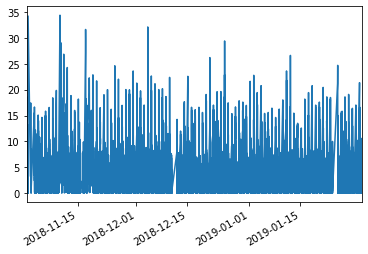

In [489]:
time_till_next_obs.replace(0, np.nan).dropna().minutes.plot()

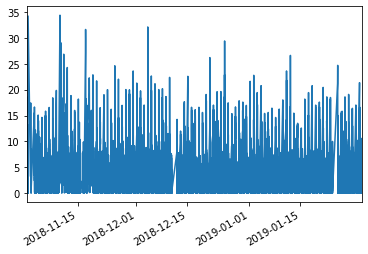

In [389]:
%matplotlib inline
import matplotlib.pyplot as plt

time_till_next_obs['minutes'].plot()

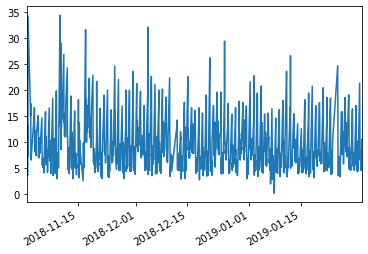

In [390]:
time_till_next_obs['minutes'].resample('H').max().dropna().plot()

# Choose examples based on looking at when "resumed" messages were sent out

## Good examples:
2018-12-04 10:00:00 	NYC 	UPDATED: MANH, N and R Trains, Medical Assistance 	N and R trains have resumed regular service af...
2018-12-06 16:02:00 	NYC 	UPDATED: BKLYN, D, N and R Trains, FDNY Activity 	D, N and R train service has resumed with dela...
2018-12-08 17:28:00 	NYC 	UPDATED: QNS, N and Q Trains, Medical Assistance 	N, Q and R train service has resumed with dela...
2018-12-09 06:58:00 	NYC 	UPDATED: BKLYN, N and R Trains, Brakes Activated 	Northbound N and R train service have resumed ...
2018-12-20 10:13:00 	NYC 	UPDATED: MANH, N, Q, R and W Trains, Authorize... 	N, Q, R, and W train service has resumed with ...

## Maybe examples:
2018-12-10 07:50:00 	NYC 	UPDATED: QNS, N, R and W Trains, Mechanical pr... 	Northbound N, R and W train service has resume...


## Bad examples:
( southbound )
2018-12-03 09:46:00 	NYC 	UPDATED: MANH, N, Q, R and W Trains, Signal Pr... 	Southbound N and Q trains have resumed regular...
2018-12-14 07:19:00 	NYC 	UPDATED: BKLYN, N and R Trains, NYPD Activity 	Northbound N and R train service has resumed f...
2018-12-17 14:23:00 	NYC 	UPDATED: QNS, N and W Trains, Brakes Activated 	N and W train service has resumed with delays ...
2018-12-20 18:43:00 	NYC 	UPDATED: QNS, N and W Trains, Train Removed Fr... 	N and W train service has resumed with delays ...
2018-12-20 20:50:00 	NYC 	UPDATED: BKLYN, B, D, N, Q Trains, Medical Ass... 	Southbound B and Q trains have resumed making ...
2018-12-24 10:15:00 	NYC 	UPDATED: BKLYN, B, D, N, and Q Trains, Signal ... 	Regular B D N Q R and W train service has resu...

2018-12-22 ( Huge spike ~15:00, but no alert )



In [447]:
observed.index

DatetimeIndex(['2018-11-01 04:23:00-04:00', '2018-11-01 04:24:00-04:00',
               '2018-11-01 04:25:00-04:00', '2018-11-01 04:26:00-04:00',
               '2018-11-01 04:27:00-04:00', '2018-11-01 04:28:00-04:00',
               '2018-11-01 04:29:00-04:00', '2018-11-01 04:30:00-04:00',
               '2018-11-01 04:31:00-04:00', '2018-11-01 04:32:00-04:00',
               ...
               '2019-01-31 18:45:00-05:00', '2019-01-31 18:46:00-05:00',
               '2019-01-31 18:47:00-05:00', '2019-01-31 18:48:00-05:00',
               '2019-01-31 18:49:00-05:00', '2019-01-31 18:50:00-05:00',
               '2019-01-31 18:51:00-05:00', '2019-01-31 18:52:00-05:00',
               '2019-01-31 18:53:00-05:00', '2019-01-31 18:54:00-05:00'],
              dtype='datetime64[ns, US/Eastern]', length=131972, freq='T')

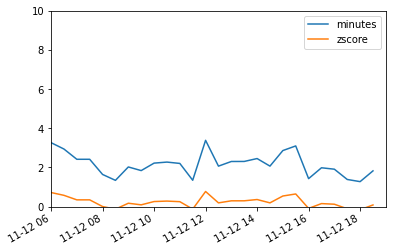

In [444]:
# Get average value by hour:
ax = observed.loc[:,['minutes','zscore']].loc['2018-11-12'].between_time("06:00","19:00").resample('30T').mean().plot(ylim=(0, 10))


In [437]:
#alert_df.loc[alert_df.Subject.str.match(r'.* N(?:(, )|( and)).*') & alert_df.Message.str.match(r'.*Northbound.*')].between_time('04:00','21:00')
alert_df.loc[alert_df.Subject.str.match(r'.* N(?:(, )|( and)).*')].loc['2018-11'].between_time('04:00','12:00')

,Agency,Subject,Message
Date,,,
2018-11-01 04:08:00,NYC,"UPDATED: BKLYN, D, N and R Trains, NYPD Activity","D, N and R train service has resumed after ear..."
2018-11-10 11:05:00,NYC,"MANH, N, Q and R Trains, Unauthorized on the T...","N, Q and R trains are running with delays in b..."
2018-11-10 11:18:00,NYC,"UPDATED: MANH, N, Q and R Trains, Unauthorized...","There are service changes and delays on N, Q a..."
2018-11-10 11:27:00,NYC,"UPDATED: MANH, N, Q and R Trains, Unauthorized...","N, Q and R train service has resumed with dela..."
2018-11-12 10:01:00,NYC,"UPDATED: BKLYN, D, N and R Trains, Switch prob...",Northbound N trains are running local from 59 ...
2018-11-15 04:45:00,NYC,"MANH, N, Q and R Trains, Earlier Incident -Med...","N, Q and R train service has resumed after EMS..."
2018-11-15 04:46:00,NYC,"UPDATED: BKLYN, N and R Trains, Track Maintenance",N and R train service has resumed after earlie...
2018-11-15 06:46:00,NYC,"MANH, N and Q Trains, Brakes activated",Southbound N and Q trains are running local fr...
2018-11-15 07:11:00,NYC,"UPDATED: MANH, N and Q Trains, Brakes activated",N and Q train service has resumed with delays ...


In [409]:
alert_df.loc[alert_df.Subject.str.match(r'.* N(?:(, )|( and)).*')].between_time('06:00','8:00')

,Agency,Subject,Message
Date,,,
2018-01-04 06:00:00,NYC,"UPDATED: MANH, D, N and Q Trains, Weather Cond...","There is no express D, N and Q train service b..."
2018-01-05 06:57:00,NYC,"MANH, N, Q, R and W Trains, NYPD Investigation","Southbound N, Q, R and W trains are running wi..."
2018-01-05 07:01:00,NYC,"UPDATED: MANH, N, Q, R and W Trains, NYPD Inve...","N, Q, R and W train service has resumed follow..."
2018-01-07 06:59:00,NYC,"MANH, N, Q, R Trains, Signal Problems","Northbound N, Q and R trains are running with ..."
2018-01-07 07:00:00,NYC,"UPDATED: MANH, F, N, Q, R Trains, Signal Problems","Northbound F, N, Q and R trains are running wi..."
...,...,...,...
2018-12-11 07:58:00,NYC,"UPDATED: BKLYN, D, N and R Trains, Switch Problem","D, N and R service is resuming in Brooklyn aft..."
2018-12-14 07:09:00,NYC,"BKLYN, N and R Trains, NYPD Activity",Northbound N and R trains are running with del...
2018-12-14 07:19:00,NYC,"UPDATED: BKLYN, N and R Trains, NYPD Activity",Northbound N and R train service has resumed f...


In [492]:
train_wait.index

DatetimeIndex(['2018-11-01 04:23:19-04:00', '2018-11-01 04:25:09-04:00',
               '2018-11-01 04:25:19-04:00', '2018-11-01 04:25:34-04:00',
               '2018-11-01 04:25:44-04:00', '2018-11-01 04:26:09-04:00',
               '2018-11-01 04:35:20-04:00', '2018-11-01 04:40:39-04:00',
               '2018-11-01 04:59:09-04:00', '2018-11-01 05:01:09-04:00',
               ...
               '2019-01-31 18:50:00-05:00', '2019-01-31 18:50:35-05:00',
               '2019-01-31 18:51:10-05:00', '2019-01-31 18:51:45-05:00',
               '2019-01-31 18:51:49-05:00', '2019-01-31 18:52:25-05:00',
               '2019-01-31 18:53:00-05:00', '2019-01-31 18:53:10-05:00',
               '2019-01-31 18:53:24-05:00', '2019-01-31 18:54:24-05:00'],
              dtype='datetime64[ns, US/Eastern]', length=47417, freq=None)

In [494]:
alert_df.index

DatetimeIndex(['2018-01-01 00:20:00', '2018-01-01 00:20:00',
               '2018-01-01 00:24:00', '2018-01-01 01:13:00',
               '2018-01-01 02:50:00', '2018-01-01 03:12:00',
               '2018-01-01 04:18:00', '2018-01-01 06:36:00',
               '2018-01-01 07:17:00', '2018-01-01 07:43:00',
               ...
               '2019-03-31 21:07:00', '2019-03-31 21:21:00',
               '2019-03-31 21:35:00', '2019-03-31 21:36:00',
               '2019-03-31 22:10:00', '2019-03-31 22:16:00',
               '2019-03-31 22:22:00', '2019-03-31 23:00:00',
               '2019-03-31 23:14:00', '2019-03-31 23:57:00'],
              dtype='datetime64[ns]', name='Date', length=33116, freq=None)

In [465]:
# Find if alerts are predictive
# Get a list of alert times for N train

alert_dir = '../data/raw/alerts'
alert_files = glob.glob(os.path.abspath(os.path.join(alert_dir, 'raw_alerts_*.csv')))
alert_list = []
for f in alert_files:
    alert_list.append(pd.read_csv(f))
alert_df = pd.concat(alert_list)
alert_df.index = alert_df.Date.map(pd.to_datetime)
alert_df.drop(columns=['Date'], inplace=True)
alert_df.sort_index(inplace=True)

In [466]:
alert_df.index

DatetimeIndex(['2018-01-01 00:20:00', '2018-01-01 00:20:00',
               '2018-01-01 00:24:00', '2018-01-01 01:13:00',
               '2018-01-01 02:50:00', '2018-01-01 03:12:00',
               '2018-01-01 04:18:00', '2018-01-01 06:36:00',
               '2018-01-01 07:17:00', '2018-01-01 07:43:00',
               ...
               '2019-03-31 21:07:00', '2019-03-31 21:21:00',
               '2019-03-31 21:35:00', '2019-03-31 21:36:00',
               '2019-03-31 22:10:00', '2019-03-31 22:16:00',
               '2019-03-31 22:22:00', '2019-03-31 23:00:00',
               '2019-03-31 23:14:00', '2019-03-31 23:57:00'],
              dtype='datetime64[ns]', name='Date', length=33116, freq=None)

In [969]:
train_wait = time_till_next_obs.replace(0, np.nan).dropna().minutes.resample('1T').mean()

In [970]:
train_wait.autocorr()

0.10779298694742386

In [971]:
train_wait

2018-11-01 04:23:00-04:00    1.833333
2018-11-01 04:24:00-04:00         NaN
2018-11-01 04:25:00-04:00    0.250000
2018-11-01 04:26:00-04:00    9.183333
2018-11-01 04:27:00-04:00         NaN
                               ...   
2019-01-31 18:50:00-05:00    0.583333
2019-01-31 18:51:00-05:00    0.416667
2019-01-31 18:52:00-05:00    0.583333
2019-01-31 18:53:00-05:00    0.466667
2019-01-31 18:54:00-05:00    6.183333
Freq: T, Name: minutes, Length: 131972, dtype: float64

In [1101]:
#train_alerts = alert_df.loc[alert_df.Subject.str.match(r'.* N(?:(, )|( and)).*') & alert_df.Message.str.match(r'.*brake.*')].between_time('06:00','19:00')
train_alerts = alert_df.loc[alert_df.Subject.str.match(r'.* N(?:(, )|( and)).*') & alert_df.Subject.str.match(r'.*NYPD.*')].between_time('06:00','19:00')
#train_alerts = alert_df.loc[alert_df.Subject.str.match(r'.* N(?:(, )|( and)).*') ].between_time('06:00','19:00')
#train_alerts = alert_df.loc[alert_df.Subject.str.match(r'.* N(?:(, )|( and)).*')]
MINUTE_DURATION = 40

alert_mask = pd.DataFrame(index=train_wait.index, columns=['alerted'])
alert_mask[:] = False

widgets = [progressbar.Percentage(), progressbar.Bar()]
bar = progressbar.ProgressBar(widgets=widgets, max_value=len(alert_df.index), min_poll_interval=.5).start()

for i,t in enumerate(train_alerts.loc[train_wait.index[0]:train_wait.index[-1]].index):
    ts = pd.Timestamp(t, tz='US/Eastern')
    alert_mask.loc[ts:ts+pd.Timedelta(MINUTE_DURATION, unit='m')] = True
    bar.update(i+1)
bar.finish()

100%|#########################################################################|


In [1102]:
train_alerts.shape

(51, 3)

In [1103]:
train_wait.autocorr()

0.10779298694742386

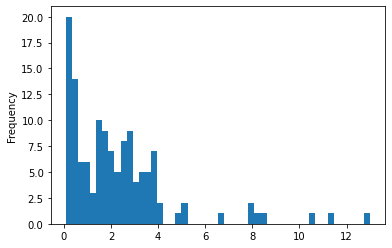

In [1104]:
train_wait[alert_mask.alerted].dropna().plot.hist(bins=50)

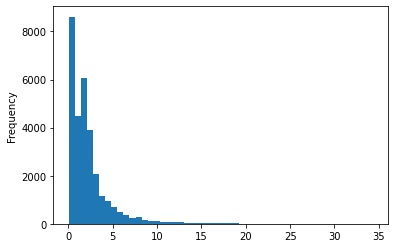

In [1105]:
train_wait[~alert_mask.alerted].dropna().plot.hist(bins=50)

In [1106]:
from scipy.stats import ttest_ind

ttest_ind(train_wait[alert_mask.alerted].dropna(), train_wait[~alert_mask.alerted].dropna())


Ttest_indResult(statistic=0.26175230725387916, pvalue=0.7935141862038253)

In [1107]:
from scipy.stats import ks_2samp
ks_2samp(train_wait[alert_mask.alerted].dropna(), train_wait[~alert_mask.alerted].dropna())

Ks_2sampResult(statistic=0.11137872447654007, pvalue=0.07862551315083603)

In [1108]:
train_wait[alert_mask.alerted].dropna().shape

(131,)

In [1083]:
train_wait[~alert_mask.alerted].dropna().shape

(30123,)